# Overview:
### 1. Get Locations for Most Promising Sensors
### 2. Get Base Info of Sensors (location, active time,...)
### 3. Load Wildfire Data (Cali Wildfires)
### 4. Calculate approximate radius based on size of fires in acres_burned
### 5. Calculate Distance Sensors <--> Fires
### 6. Join with original dfs to get name, location and base info for each sensor
### 7. Plot Real Life Data of Most popular Sensors¶(Analyze 13 most promising sensors)
### 8. Outline for Next Steps

# 1. Get Locations for Most Promising Sensors

In [3]:
import requests
import pandas as pd

In [4]:
List_of_Sensors = [40709, 99759, 12120, 12118, 12869, 36619, 12825,
                     73659, 50115,4091,16697,92213, 116005,
                   86277, 66849, 4478, 67199,63223, 62357, 38569,37393, 34275,14335,96887,
                   39243,98091,84099,81093, 11846,12302,5928,47673,18557]
List_of_Locations = ["Markleeville", "Markleeville", "Markleeville", "Markleeville", "Brookdale",
                     "Brookdale", "Camp_Nelson", "Camp_Nelson",
                     "Santa_Paula","Santa_Paula","Santa_Paula",
                     "Berryessa", "Berryessa", "Berryessa", "Berryessa", "Berryessa", "Berryessa","Berryessa",
                     "Berryessa", "Berryessa","Berryessa", "Berryessa","Berryessa",
                     "HoneyLake", "HoneyLake","HoneyLake","HoneyLake","HoneyLake", "HoneyLake","HoneyLake",
                     "HoneyLake", "HoneyLake","South_lake_tahoe"]

Sensor_df = pd.DataFrame({'Sensor_ID': List_of_Sensors, 'Location': List_of_Locations})

# Display the DataFrame
Sensor_df.head()

Sensor_ID      Location
0      40709  Markleeville
1      99759  Markleeville
2      12120  Markleeville
3      12118  Markleeville
4      12869     Brookdale

In [5]:
Sensor_df.head(40)

Sensor_ID          Location
0       40709      Markleeville
1       99759      Markleeville
2       12120      Markleeville
3       12118      Markleeville
4       12869         Brookdale
5       36619         Brookdale
6       12825       Camp_Nelson
7       73659       Camp_Nelson
8       50115       Santa_Paula
9        4091       Santa_Paula
10      16697       Santa_Paula
11      92213         Berryessa
12     116005         Berryessa
13      86277         Berryessa
14      66849         Berryessa
15       4478         Berryessa
16      67199         Berryessa
17      63223         Berryessa
18      62357         Berryessa
19      38569         Berryessa
20      37393         Berryessa
21      34275         Berryessa
22      14335         Berryessa
23      96887         HoneyLake
24      39243         HoneyLake
25      98091         HoneyLake
26      84099         HoneyLake
27      81093         HoneyLake
28      11846         HoneyLake
29      12302         HoneyLake
30       5928         HoneyLake
31      47673         HoneyLake
32      18557  South_lake_tahoe

# 2. Get Base Info of Sensors (location, active time,...)

In [50]:
import requests
import pandas as pd

api_key = "E911C960-894A-11EE-8616-42010A80000B"

list_of_sensors = List_of_Sensors

sensor_data_list = []

endpoint = "https://api.purpleair.com/v1/sensors/"

headers = {
    "X-API-Key": api_key,
}

# Example parameters, you can modify or add more as needed
params = {
    "fields": "name, model, hardware, location_type, private, latitude, longitude, altitude, position_rating, uptime, pa_latency, memory, last_seen, last_modified, date_created",
}

for sensor_id in list_of_sensors:
    try:
        response = requests.get(f"{endpoint}{sensor_id}", headers=headers, params=params)

        if response.status_code == 200:
            sensor_info = response.json().get('sensor')
            sensor_data_list.append(sensor_info)

        else:
            print(f"Error for sensor {sensor_id}: {response.status_code} - {response.text}")

    except Exception as e:
        print(f"An error occurred for sensor {sensor_id}: {e}")

# Create a DataFrame from the list of sensor data
df = pd.DataFrame(sensor_data_list)

# Convert date-related columns to datetime
date_columns = ['last_modified', 'date_created', 'last_seen']
df[date_columns] = df[date_columns].apply(pd.to_datetime, unit='s')

# Display the DataFrame
df.head()

sensor_index       last_modified        date_created           last_seen  \
0         40709 2022-02-20 18:15:58 2019-11-05 18:27:16 2023-11-27 04:35:29   
1         99759 2021-03-08 16:51:35 2021-02-11 16:39:09 2022-07-20 08:48:51   
2         12120 2018-11-09 18:08:22 2018-06-23 22:09:09 2023-11-21 22:45:05   
3         12118 2018-11-09 19:04:29 2018-06-23 21:00:31 2021-07-17 07:23:57   
4         12869 2018-07-16 17:51:00 2018-07-11 18:43:22 2020-08-20 06:25:16   

   private                         name  location_type     model  \
0        0              CA Alps Cycling              0     PA-II   
1        0                   Pinion Rd.              0  PA-II-SD   
2        0  CARB_S_GBUAPCD_Markleeville              0     PA-II   
3        0     CARB_S_GBUAPCD_Woodfords              0     PA-II   
4        0                 Empire Grade              0     PA-II   

                                                hardware  uptime  pa_latency  \
0                         2.0+BME280+PMSX003-B+PMSX003-A   11978         454   
1  2.0+OPENLOG+NO-DISK+DS3231+BME280+PMSX003-B+PMSX003-A   11403         694   
2                         2.0+BME280+PMSX003-B+PMSX003-A      44        8575   
3                         2.0+BME280+PMSX003-B+PMSX003-A     192         321   
4                         2.0+BME280+PMSX003-B+PMSX003-A    1183         229   

   memory  position_rating   latitude   longitude  altitude  
0   16096                5  38.690445 -119.795555      5602  
1   15552                5  38.687325 -119.800385      5795  
2   16360                5  38.693980 -119.779330      5501  
3   16016                5  38.770596 -119.816950      5671  
4   19584                5  37.100470 -122.141310      2608

In [51]:
df.head(40)

sensor_index       last_modified        date_created           last_seen  \
0          40709 2022-02-20 18:15:58 2019-11-05 18:27:16 2023-11-27 04:35:29   
1          99759 2021-03-08 16:51:35 2021-02-11 16:39:09 2022-07-20 08:48:51   
2          12120 2018-11-09 18:08:22 2018-06-23 22:09:09 2023-11-21 22:45:05   
3          12118 2018-11-09 19:04:29 2018-06-23 21:00:31 2021-07-17 07:23:57   
4          12869 2018-07-16 17:51:00 2018-07-11 18:43:22 2020-08-20 06:25:16   
5          36619 2019-08-29 21:36:09 2019-08-02 16:55:10 2023-10-24 15:47:44   
6          12825 2018-07-29 19:13:48 2018-07-11 17:13:10 2023-11-27 04:35:52   
7          73659 2021-08-29 18:17:28 2020-09-28 22:08:43 2023-11-27 04:34:49   
8          50115 2021-10-25 14:02:40 2020-03-13 20:49:35 2021-10-25 14:01:35   
9           4091 2018-08-04 01:00:14 2017-11-04 23:45:06 2023-04-30 17:28:18   
10         16697 2019-02-05 19:27:20 2018-09-29 18:48:30 2019-12-07 08:35:03   
11         92213 2020-12-28 16:46:43 2020-11-24 18:05:13 2023-11-27 04:34:50   
12        116005 2021-09-13 18:55:12 2021-07-22 22:29:59 2023-11-27 04:34:19   
13         86277 2020-10-30 23:15:33 2020-10-28 19:21:46 2023-11-27 04:34:35   
14         66849 2020-09-19 01:30:19 2020-09-09 15:53:21 2023-11-27 04:35:45   
15          4478 2017-11-24 20:47:02 2017-11-18 02:40:46 2023-11-27 04:34:25   
16         67199 2022-04-13 22:18:35 2020-09-09 20:48:32 2023-11-27 04:34:29   
17         63223 2021-09-16 23:18:12 2020-08-28 15:46:00 2021-09-16 23:15:23   
18         62357 2022-09-11 23:33:36 2020-08-24 23:11:14 2023-11-27 04:36:02   
19         38569 2019-10-29 18:04:57 2019-08-29 14:44:10 2020-09-28 09:45:11   
20         37393 2020-07-21 21:55:00 2019-08-09 20:07:28 2023-11-27 04:34:49   
21         34275 2019-11-19 20:29:32 2019-07-04 17:10:39 2022-10-13 19:17:12   
22         14335 2019-08-11 18:24:27 2018-08-05 17:12:00 2023-11-27 04:35:11   
23         96887 2021-06-24 22:20:21 2020-12-29 21:55:57 2023-11-27 04:35:42   
24         39243 2020-08-19 20:31:19 2019-09-19 19:04:29 2023-10-28 19:53:58   
25         98091 2021-04-21 19:13:27 2021-01-21 22:22:44 2023-11-27 04:35:15   
26         84099 2021-06-19 16:21:59 2020-10-21 15:09:06 2023-11-27 04:34:37   
27         81093 2020-10-20 00:49:56 2020-10-13 20:25:43 2023-11-27 04:34:38   
28         11846 2021-08-11 21:41:02 2018-06-12 22:06:10 2023-11-27 04:34:13   
29         12302 2021-08-12 18:51:37 2018-06-28 20:03:39 2023-11-27 04:35:26   
30          5928 2019-02-05 19:59:25 2018-01-12 00:55:38 2023-09-28 00:21:28   
31         47673 2020-10-05 17:07:02 2020-01-30 17:03:44 2023-11-27 04:34:51   
32         18557 2019-06-12 21:51:59 2018-11-06 00:04:30 2023-11-27 04:35:12   

    private                                            name  location_type  \
0         0                                 CA Alps Cycling              0   
1         0                                      Pinion Rd.              0   
2         0                     CARB_S_GBUAPCD_Markleeville              0   
3         0                        CARB_S_GBUAPCD_Woodfords              0   
4         0                                    Empire Grade              0   
5         0                                Empire/Pine Flat              0   
6         0                                      Blue Ridge              0   
7         0                                        Coy Flat              0   
8         0                                      South Mtn.              0   
9         0                                 Tasca di Stelle              0   
10        0            CARB_Smoke_SBCAPCD_Las Flores Canyon              0   
11        0                                     Pope Valley              0   
12        0                   Pope Valley Elementary School              0   
13        0                                Mission Vineyard              0   
14        0                                     Angwin home              1   
15        0                        

# 3. Load Wildfire Data (Cali Wildfires)
### Filter after 2019-01-01, maybe change to 2018 later, depending on the sensors

In [52]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = "/Users/jakobkuemmerle/Documents/CDL/Cali_Wildfire_incidents_Data.csv"

# Read the CSV file into a DataFrame
df_wildfires = pd.read_csv(csv_file_path)

# Convert date-related columns to datetime without specifying unit
date_columns = ['incident_date_created', 'incident_date_last_update', 'incident_date_extinguished']
df_wildfires[date_columns] = df_wildfires[date_columns].apply(pd.to_datetime)

# Display the DataFrame
df_wildfires.head()

incident_name incident_is_final incident_date_last_update  \
0    Bridge Fire                 Y 2018-01-09 13:46:00+00:00   
1      Pala Fire                 Y 2020-09-16 14:07:35+00:00   
2     River Fire                 Y 2022-10-24 11:39:23+00:00   
3  Fawnskin Fire                 Y 2013-04-22 09:00:00+00:00   
4      Gold Fire                 Y 2013-05-01 07:00:00+00:00   

      incident_date_created          incident_administrative_unit  \
0 2017-10-31 11:22:00+00:00        Shasta-Trinity National Forest   
1 2009-05-24 14:56:00+00:00               CAL FIRE San Diego Unit   
2 2013-02-24 08:16:00+00:00          CAL FIRE San Bernardino Unit   
3 2013-04-20 17:30:00+00:00        San Bernardino National Forest   
4 2013-04-30 12:59:00+00:00  CAL FIRE Madera-Mariposa-Merced Unit   

   incident_administrative_unit_url incident_county  \
0                               NaN          Shasta   
1                               NaN       San Diego   
2                               NaN            Inyo   
3                               NaN  San Bernardino   
4                               NaN          Madera   

                                                                          incident_location  \
0                                          I-5 and Turntable Bay, 7 miles NE of Shasta Lake   
1                                               Hwy 76 and Pala Temecula, northwest of Pala   
2                            south of Narrow Gauge Rd & north of Hwy 136, east of Lone Pine   
3  west of Delamar Mountain, north of the community of Fawnskin, northside of Big Bear Lake   
4                  Between Road 210 and Road 200 near Fine Gold Creek in the community of O   

   incident_acres_burned  incident_containment  ...  \
0                   37.0                 100.0  ...   
1                  122.0                 100.0  ...   
2                  407.0                 100.0  ...   
3                   30.0                 100.0  ...   
4                  274.0                 100.0  ...   

                            incident_id  \
0  2ca11d45-8139-4c16-8af0-880d99b21e82   
1  8f61f461-552d-4538-b186-35ab030da416   
2  094719ba-a47b-4abb-9ec5-a506b2b9fd23   
3  58f89ff8-bd3e-4355-b1c0-8fa05c747d3f   
4  357ffc13-bef9-48eb-810f-c5de851972eb   

                                                  incident_url  \
0   https://osfm.fire.ca.gov/incidents/2017/10/31/bridge-fire/   
1      https://osfm.fire.ca.gov/incidents/2009/5/24/pala-fire/   
2     https://osfm.fire.ca.gov/incidents/2013/2/24/river-fire/   
3  https://osfm.fire.ca.gov/incidents/2013/4/20/fawnskin-fire/   
4      https://osfm.fire.ca.gov/incidents/2013/4/30/gold-fire/   

   incident_date_extinguished  incident_dateonly_extinguished  \
0   2018-01-09 13:46:00+00:00                          1/9/18   
1   2009-05-25 00:00:00+00:00                         5/25/09   
2   2013-02-28 20:00:00+00:00                         2/28/13   
3   2013-04-22 09:00:00+00:00                         4/22/13   
4   2013-05-01 07:00:00+00:00                          5/1/13   

  incident_dateonly_created is_active calfire_incident notification_desired  \
0                  10/31/17         N            False                False   
1                   5/24/09         N             True                False   
2                   2/24/13         N             True                False   
3                   4/20/13         N            False                False   
4                   4/30/13         N             True                False   

  incident_longitude_rounded incident_latitude_rounded  
0                     -122.3                      40.8  
1                        1.0                       1.0  
2                     -118.0                      36.6  
3                     -116.9                      34.3  
4                     -119.6                      37.1  

[5 rows x 25 columns]

In [62]:
# Filter rows where incident_date_created is greater than January 1, 2019
df_filtered = df_wildfires[df_wildfires['incident_date_created'] > '2019-01-01']
df_filtered.shape

(979, 25)

# 4. Calculate approximate radius based on size of fires in acres_burned
### Take 50% of radius to be more realistic, still only an approximation, but not too bad

In [63]:
import numpy as np
#0.004047

# Use .loc to explicitly set values in the DataFrame
df_filtered.loc[:, 'calculated_radius_km'] = np.sqrt((0.004047 * df_filtered['incident_acres_burned']) / np.pi)
#df_filtered.loc[:, 'adjusted_radius_km'] = 4 * df_filtered['calculated_radius_km']
df_filtered.loc[:, 'adjusted_radius_km'] = 10

df_filtered.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/3401534640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'calculated_radius_km'] = np.sqrt((0.004047 * df_filtered['incident_acres_burned']) / np.pi)
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/3401534640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'adjusted_radius_km'] = 10


incident_name incident_is_final incident_date_last_update  \
1198    Pilot Fire                 Y 2019-01-15 10:38:00+00:00   
1207    Scott Fire                 Y 2019-06-27 08:24:51+00:00   
1208     York Fire                 Y 2019-06-24 11:45:00+00:00   
1209     Cana Fire                 Y 2019-05-08 08:47:00+00:00   
1210    Woody Fire                 Y 2019-05-08 08:47:00+00:00   

         incident_date_created      incident_administrative_unit  \
1198 2019-01-01 14:14:00+00:00   CAL FIRE Humbolt-Del Norte Unit   
1207 2019-06-25 13:51:09+00:00  CAL FIRE Nevada-Yuba-Placer Unit   
1208 2019-04-28 22:20:00+00:00               Fresno-Kings County   
1209 2019-04-30 12:20:00+00:00      CAL FIRE / Butte County Fire   
1210 2019-04-30 18:37:00+00:00       Kern County Fire Department   

      incident_administrative_unit_url incident_county  \
1198                               NaN        Humboldt   
1207                               NaN            Yuba   
1208                               NaN           Kings   
1209                               NaN           Butte   
1210                               NaN            Kern   

                                                 incident_location  \
1198      Pilot Ridge Rd & USFS Route 1, southwest of Willow Creek   
1207            off Scott Forbes Rd, 5 miles east of Browns Valley   
1208  Hwy 41 and York Ave, 13 miles south of Avenal (Kings County)   
1209     Off Hamilton Nord Cana Hwy & Cana Hwy, northeast of Chico   
1210       Woody Rd & Horseshoe Ranch Rd, northeast of Bakersfield   

      incident_acres_burned  incident_containment  ...  \
1198                   30.0                 100.0  ...   
1207                   80.0                 100.0  ...   
1208                  161.0                 100.0  ...   
1209                   10.0                 100.0  ...   
1210                  115.0                 100.0  ...   

     incident_date_extinguished incident_dateonly_extinguished  \
1198  2019-01-15 10:38:00+00:00                        1/15/19   
1207  2019-06-25 13:50:00+00:00                        6/25/19   
1208  2019-06-24 11:45:00+00:00                        6/24/19   
1209  2019-05-08 08:47:00+00:00                         5/8/19   
1210  2019-05-08 08:47:00+00:00                         5/8/19   

      incident_dateonly_created  is_active calfire_incident  \
1198                     1/1/19          N             True   
1207                    6/25/19          N             True   
1208                    4/28/19          N             True   
1209                    4/30/19          N             True   
1210                    4/30/19          N            False   

     notification_desired incident_longitude_rounded  \
1198                False                     -123.7   
1207                False                     -121.3   
1208                False                     -120.1   
1209                False                     -122.0   
1210                False                     -118.9   

     incident_latitude_rounded calculated_radius_km adjusted_radius_km  
1198                      40.6             0.196586                 10  
1207                      39.2             0.321023                 10  
1208                      35.8             0.455412                 10  
1209                      39.8             0.113499                 10  
1210                      35.7             0.384894                 10  

[5 rows x 27 columns]

In [64]:
df_filtered.sort_values('adjusted_radius_km', ascending = False).head(40)

incident_name incident_is_final incident_date_last_update  \
1198       Pilot Fire                 Y 2019-01-15 10:38:00+00:00   
1849       Quail Fire                 Y 2021-07-21 15:55:48+00:00   
1851  Frenchtown Fire                 Y 2021-07-22 07:22:14+00:00   
1852    Mountain Fire                 Y 2021-07-24 16:56:31+00:00   
1853        Park Fire                 Y 2021-08-17 11:54:17+00:00   
1854   Pinnacles Fire                 Y 2021-09-12 10:36:17+00:00   
1855       Evans Fire                 Y 2021-08-17 11:56:06+00:00   
1856   McFarland Fire                 Y 2021-09-20 08:26:23+00:00   
1857       Robie Fire                 Y 2021-08-17 21:04:40+00:00   
1858      Hungry Fire                 Y 2021-08-06 15:46:55+00:00   
1859       Tobin Fire                 Y 2021-07-31 22:39:47+00:00   
1860    Antelope Fire                 Y 2022-10-14 08:05:09+00:00   
1861      Hiding Fire                 Y 2021-08-05 09:33:01+00:00   
1862    Monument Fire                 Y 2022-10-14 08:13:30+00:00   
1863    River Complex                 Y 2022-10-14 08:21:12+00:00   
1864     Antonio Fire                 Y 2021-08-17 11:50:56+00:00   
1865       House Fire                 Y 2021-08-10 20:50:09+00:00   
1866       River Fire                 Y 2022-10-12 10:17:50+00:00   
1867     Hambone Fire                 Y 2021-08-18 14:50:08+00:00   
1868      Nelson Fire                 Y 2021-08-13 08:44:56+00:00   
1869        Glen Fire                 Y 2021-08-21 07:56:16+00:00   
1870      Middle Fire                 Y 2021-08-13 20:53:36+00:00   
1871      Coyote Fire                 Y 2021-08-15 21:47:04+00:00   
1872        Bell Fire                 Y 2021-08-19 19:48:26+00:00   
1873      Caldor Fire                 Y 2023-02-16 11:40:23+00:00   
1874     Walkers Fire                 Y 2021-09-20 08:41:18+00:00   
1875       Cache Fire                 Y 2021-09-16 08:29:26+00:00   
1876      McCash Fire                 Y 2021-11-02 11:43:46+00:00   
1877      French Fire                 Y 2021-11-12 12:02:39+00:00   
1850        Peak Fire                 Y 2021-08-17 11:55:25+00:00   
1848     Chicken Fire                 Y 2021-07-22 09:10:11+00:00   
1940       River Fire                 Y 2023-06-14 09:19:13+00:00   
1847        Fork Fire                 Y 2021-07-20 15:37:00+00:00   
1820     Tennant Fire                 Y 2021-07-15 16:13:43+00:00   
1821     Beswick Fire                 Y 2021-07-03 17:13:04+00:00   
1822        Blue Fire                 Y 2021-07-12 08:05:31+00:00   
1823        Salt Fire                 Y 2021-07-20 08:46:22+00:00   
1824         R-1 Fire                 Y 2022-01-18 12:55:14+00:00   
1825       Sugar Fire                 Y 2022-01-18 12:55:30+00:00   
1826      Ysabel Fire                 Y 2021-07-06 19:41:26+00:00   

         incident_date_created  \
1198 2019-01-01 14:14:00+00:00   
1849 2021-07-20 13:52:41+00:00   
1851 2021-07-20 16:36:32+00:00   
1852 2021-07-23 00:00:00+00:00   
1853 2021-07-26 00:00:00+00:00   
1854 2021-07-28 00:00:00+00:00   
1855 2021-07-29 19:14:42+00:00   
1856 2021-07-30 18:44:00+00:00   
1857 2021-07-30 00:00:00+00:00   
1858 2021-07-31 00:00:00+00:00   
1859 2021-07-31 17:10:53+00:00   
1860 2021-08-01 11:28:25+00:00   
1861 2021-08-01 00:00:00+00:00   
1862 2021-07-30 12:28:00+00:00   
1863 2021-07-30 18:17:40+00:00   
1864 2021-08-03 13:02:00+00:00   
1865 2021-08-04 00:00:00+00:00   
1866 2021-08-04 08:00:00+00:00   
1867 2021-08-06 11:11:37+00:00   
1868 2021-08-07 00:00:00+00:00   
1869 2021-08-11 00:00:00+00:00   
1870 2021-08-13 00:00:00+00:00   
1871 2021-08-13 00:00:00+00:00   
1872 2021-08-14 00:00:00+00:00   
1873 2021-08-14 18:54:00+00:00   
1874 2021-08-16 16:05:54+00:00   
1875 2021-08-18 12:34:00+00:00   
1876 2021-08-18 08:50:00+00:00   
1877 2021-08-18 18:20:00+00:00   
1850 2021-07-20 11:40:00+00:00   
1848 2021-07-18 13:34:00+00:00   
1940 2022-05-24 13:30:00+00:00   
1847 2021-07-17 17:40:13+00:00   
1820 2021-06-28 16:07:

# 5. Calculate Distance Sensors <--> Fires
### 5.1 Calc distance from all Sensors to all Fires using haversine function between lat/long points
### 5.2 Filter out combinations where distance is larger than the approximated radius of the fire
### 5.3 Filter out combinations where the fire happened at a time outside of the sensor time range
### 5.4 groupby Sensor and put matching Wildfires in a list, that is our base
### 5.5 count the number of relevant wildfires per sensors, more fires = better
### --> We can assume, that those wildfires have a change to be detected by the sensor

In [65]:
import pandas as pd
import numpy as np

# Define the Haversine function to calculate distances
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Create a cartesian product of the two DataFrames
cartesian_df = pd.merge(df.assign(key=1), df_filtered.assign(key=1), on='key').drop('key', axis=1)

# Filter rows based on the adjusted_radius_km
cartesian_df['distance'] = haversine(cartesian_df['latitude'], cartesian_df['longitude'],
                                     cartesian_df['incident_latitude'], cartesian_df['incident_longitude'])
result_df = cartesian_df[cartesian_df['distance'] < cartesian_df['adjusted_radius_km']]

# Ensure datetime columns are pandas datetime objects
result_df['date_created'] = pd.to_datetime(result_df['date_created'])
result_df['last_seen'] = pd.to_datetime(result_df['last_seen'])
result_df['incident_date_created'] = pd.to_datetime(result_df['incident_date_created'])
result_df['incident_date_extinguished'] = pd.to_datetime(result_df['incident_date_extinguished'])

# Convert DatetimeArray to DatetimeIndex for comparison
result_df['incident_date_created'] = result_df['incident_date_created'].dt.tz_localize(None)
result_df['incident_date_extinguished'] = result_df['incident_date_extinguished'].dt.tz_localize(None)

# Filter rows based on the overlapping timeframes
result_df = result_df[
    (result_df['date_created'] <= result_df['incident_date_extinguished']) & 
    (result_df['last_seen'] >= result_df['incident_date_created'])
]

# Group by sensor coordinates and aggregate matching incidents into a list
result_df = result_df.groupby(['sensor_index']).agg({
    'incident_name': lambda x: x.tolist()
}).reset_index()

# Rename columns
result_df.columns = ['sensor_index', 'matching_incidents']

# Display the result DataFrame
result_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1698065743.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['date_created'] = pd.to_datetime(result_df['date_created'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1698065743.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['last_seen'] = pd.to_datetime(result_df['last_seen'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1698065743.py:25: SettingWithCopyWarning: 
A value is tryi

sensor_index                 matching_incidents
0          4478  [Ink Fire, Glass Fire, Pope Fire]
1         12825                      [Yokohl Fire]
2         34275                       [Glass Fire]
3         37393                       [Glass Fire]
4         38569                       [Glass Fire]

### (Exporting the Cross Joined DF)

In [66]:
import pandas as pd
import numpy as np

result_df2 = cartesian_df[cartesian_df['distance'] < cartesian_df['adjusted_radius_km']]

# Ensure datetime columns are pandas datetime objects
result_df2['date_created'] = pd.to_datetime(result_df2['date_created'])
result_df2['last_seen'] = pd.to_datetime(result_df2['last_seen'])
result_df2['incident_date_created'] = pd.to_datetime(result_df2['incident_date_created'])
result_df2['incident_date_extinguished'] = pd.to_datetime(result_df2['incident_date_extinguished'])

# Convert DatetimeArray to DatetimeIndex for comparison
result_df2['incident_date_created'] = result_df2['incident_date_created'].dt.tz_localize(None)
result_df2['incident_date_extinguished'] = result_df2['incident_date_extinguished'].dt.tz_localize(None)

# Filter rows based on the overlapping timeframes
result_df2 = result_df2[
    (result_df2['date_created'] <= result_df2['incident_date_extinguished']) & 
    (result_df2['last_seen'] >= result_df2['incident_date_created'])
]

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1738474543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['date_created'] = pd.to_datetime(result_df2['date_created'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1738474543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['last_seen'] = pd.to_datetime(result_df2['last_seen'])
/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_2048/1738474543.py:9: SettingWithCopyWarning: 
A value is try

In [67]:
result_df2.head(30)

sensor_index       last_modified        date_created  \
640           40709 2022-02-20 18:15:58 2019-11-05 18:27:16   
1619          99759 2021-03-08 16:51:35 2021-02-11 16:39:09   
5894          12825 2018-07-29 19:13:48 2018-07-11 17:13:10   
7544          73659 2021-08-29 18:17:28 2020-09-28 22:08:43   
8351          50115 2021-10-25 14:02:40 2020-03-13 20:49:35   
11644         92213 2020-12-28 16:46:43 2020-11-24 18:05:13   
12623        116005 2021-09-13 18:55:12 2021-07-22 22:29:59   
14196         66849 2020-09-19 01:30:19 2020-09-09 15:53:21   
14210         66849 2020-09-19 01:30:19 2020-09-09 15:53:21   
14714          4478 2017-11-24 20:47:02 2017-11-18 02:40:46   
15175          4478 2017-11-24 20:47:02 2017-11-18 02:40:46   
15189          4478 2017-11-24 20:47:02 2017-11-18 02:40:46   
16154         67199 2022-04-13 22:18:35 2020-09-09 20:48:32   
17133         63223 2021-09-16 23:18:12 2020-08-28 15:46:00   
18112         62357 2022-09-11 23:33:36 2020-08-24 23:11:14   
19091         38569 2019-10-29 18:04:57 2019-08-29 14:44:10   
20070         37393 2020-07-21 21:55:00 2019-08-09 20:07:28   
21049         34275 2019-11-19 20:29:32 2019-07-04 17:10:39   
25124         98091 2021-04-21 19:13:27 2021-01-21 22:22:44   
30613         47673 2020-10-05 17:07:02 2020-01-30 17:03:44   
30790         47673 2020-10-05 17:07:02 2020-01-30 17:03:44   

                last_seen  private  \
640   2023-11-27 04:35:29        0   
1619  2022-07-20 08:48:51        0   
5894  2023-11-27 04:35:52        0   
7544  2023-11-27 04:34:49        0   
8351  2021-10-25 14:01:35        0   
11644 2023-11-27 04:34:50        0   
12623 2023-11-27 04:34:19        0   
14196 2023-11-27 04:35:45        0   
14210 2023-11-27 04:35:45        0   
14714 2023-11-27 04:34:25        0   
15175 2023-11-27 04:34:25        0   
15189 2023-11-27 04:34:25        0   
16154 2023-11-27 04:34:29        0   
17133 2021-09-16 23:15:23        0   
18112 2023-11-27 04:36:02        0   
19091 2020-09-28 09:45:11        0   
20070 2023-11-27 04:34:49        0   
21049 2022-10-13 19:17:12        0   
25124 2023-11-27 04:35:15        0   
30613 2023-11-27 04:34:51        0   
30790 2023-11-27 04:34:51        0   

                                                 name  location_type  \
640                                   CA Alps Cycling              0   
1619                                       Pinion Rd.              0   
5894                                       Blue Ridge              0   
7544                                         Coy Flat              0   
8351                                       South Mtn.              0   
11644                                     Pope Valley              0   
12623                   Pope Valley Elementary School              0   
14196                                     Angwin home              1   
14210                                     Angwin home              1   
14714                           Pacific Union College              0   
15175                           Pacific Union College              0   
15189                           Pacific Union College              0   
16154  LARKMEAD VINEYARD WINERY TASTING SALON-OUTDOOR              0   
17133                                       Bale Lane              0   
18112                                   Farmhouse Out              0   
19091                                 Newton Vineyard              0   
20070                       St. Helena Primary School              0   
21049                St. Helena Boys &amp; Girls Club              0   
25124                                     N Valley Rd              0   
30613                                      Loyalton-1              0   
30790                                      Loyalton-1              0   

          model                                                hardware  \
640       PA-II                          2.0+BME280+PMSX003-B+PMSX003-A   
1619   PA-II-SD   2.0+OPENLOG+NO-DISK+DS3231+BME

### Continuing:

In [68]:
result_df['count_fires'] = result_df['matching_incidents'].apply(len)
result_df = result_df.sort_values(by='count_fires', ascending=False)
print(result_df.shape)
result_df.head()

(17, 3)


sensor_index                 matching_incidents  count_fires
0           4478  [Ink Fire, Glass Fire, Pope Fire]            3
6          47673     [Antelope Fire, Loyalton Fire]            2
10         66849            [Glass Fire, Pope Fire]            2
9          63223                       [Glass Fire]            1
15         99759                    [Tamarack Fire]            1

# 6. Join with original dfs to get name, location and base info for each sensor
### --> The name and locations help to search on the map:
### https://map.purpleair.com/1/mAQI/a10/p0/cC0#13.49/38.6881/-119.78902

In [15]:
# Merge result_df with Sensor_df on sensor_index and Sensor_ID
result_df = result_df.merge(Sensor_df, how='left', left_on='sensor_index', right_on='Sensor_ID')

# Display the merged DataFrame
result_df.head()

sensor_index                                 matching_incidents  \
0          5928  [Hog Fire, North Fire, August Complex (include...   
1         12302  [Hog Fire, North Fire, August Complex (include...   
2         14335  [Kincade Fire, August Complex (includes Doe Fi...   
3         18557  [August Complex (includes Doe Fire), SCU Light...   
4         34275  [Kincade Fire, August Complex (includes Doe Fi...   

   count_fires  Sensor_ID          Location  
0            6       5928         HoneyLake  
1            6      12302         HoneyLake  
2            6      14335         Berryessa  
3            6      18557  South_lake_tahoe  
4            6      34275         Berryessa

In [16]:
# Set display options to show the entire contents of the 'matching_incidents' column
pd.set_option('display.max_colwidth', None)

# Display the entire DataFrame
result_df.head(40)


sensor_index  \
0           5928   
1          12302   
2          14335   
3          18557   
4          34275   
5          37393   
6           4478   
7           4091   
8          11846   
9          67199   
10         66849   
11         63223   
12         62357   
13         47673   
14         38569   
15         40709   
16         39243   
17         12120   
18         36619   
19         12869   
20         12118   
21         81093   
22         84099   
23         99759   
24         86277   
25         96887   
26         98091   
27         12825   
28         73659   
29         92213   
30        116005   

                                                                                                          matching_incidents  \
0                     [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
1                     [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
2   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
3         [August Complex (includes Doe Fire), SCU Lightning Complex, Dixie Fire, Tamarack Fire, Caldor Fire, Mosquito Fire]   
4   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
5   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
6   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
7                          [Kincade Fire, August Complex (includes Doe Fire), LNU Lightning Complex, Glass Fire, Dixie Fire]   
8                               [North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
9                 [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
10                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
11                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
12                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
13                          [Loyalton Fire, August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire, Caldor Fire]   
14              [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire]   
15                                              [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire, Caldor Fire]   
16                                          [August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
17                                              [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire, Caldor Fire]   
18                           [CZU Lightning Complex (Including Warnella Fire), SCU Lightning Complex, LNU Lightning Complex]   
19                           [CZU Lightning Complex (Including Warnella Fire), SCU Lightning Complex, LNU Lightning Complex]   
20                                                           [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire]   
21                                                      [August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire]   
22                                                      [August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire]   
23                                                                                  [Dixie Fire, Tamarack Fire, Caldor Fire]   
24                                                                          [August Complex (includes Doe Fire), Dixie Fire]   
25                                 

In [17]:
# Merge result_df with Sensor_df on sensor_index and Sensor_ID
result_df = result_df.merge(df, how='left', left_on='sensor_index', right_on='sensor_index')

# Display the merged DataFrame
result_df.head()

sensor_index  \
0          5928   
1         12302   
2         14335   
3         18557   
4         34275   

                                                                                                         matching_incidents  \
0                    [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
1                    [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
2  [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
3        [August Complex (includes Doe Fire), SCU Lightning Complex, Dixie Fire, Tamarack Fire, Caldor Fire, Mosquito Fire]   
4  [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   

   count_fires  Sensor_ID          Location       last_modified  \
0            6       5928         HoneyLake 2019-02-05 19:59:25   
1            6      12302         HoneyLake 2021-08-12 18:51:37   
2            6      14335         Berryessa 2019-08-11 18:24:27   
3            6      18557  South_lake_tahoe 2019-06-12 21:51:59   
4            6      34275         Berryessa 2019-11-19 20:29:32   

         date_created           last_seen  private  \
0 2018-01-12 00:55:38 2023-09-28 00:21:28        0   
1 2018-06-28 20:03:39 2023-11-26 18:51:19        0   
2 2018-08-05 17:12:00 2023-11-26 18:51:04        0   
3 2018-11-06 00:04:30 2023-11-26 18:51:07        0   
4 2019-07-04 17:10:39 2022-10-13 19:17:12        0   

                                name  location_type     model  \
0  Johnstonville - Diamond Crest AIR              0  PA-II-SD   
1         CARB_SMOKE_LCAPCD_RICHMOND              0     PA-II   
2         Sugarloaf Ridge State Park              0     PA-II   
3                Kirkwood, CA, 7800'              0     PA-II   
4   St. Helena Boys &amp; Girls Club              0     PA-II   

                                                hardware  uptime  pa_latency  \
0  2.0+OPENLOG+NO-DISK+DS3231+BME280+PMSX003-B+PMSX003-A    8639         319   
1                         2.0+BME280+PMSX003-B+PMSX003-A   29978         508   
2                         2.0+BME280+PMSX003-B+PMSX003-A   36091         414   
3                                2.0+PMSX003-B+PMSX003-A   32461         253   
4                         2.0+BME280+PMSX003-B+PMSX003-A   40845         295   

   memory  position_rating   latitude  longitude  altitude  
0   16280                5  40.372356 -120.59329      4168  
1   15928                5  40.371674 -120.63871      4239  
2   16160                5  38.436620 -122.50873      1242  
3   16312                5  38.684630 -120.06484      7814  
4   14808                5  38.502920 -122.47085       258

In [18]:
result_df

sensor_index  \
0           5928   
1          12302   
2          14335   
3          18557   
4          34275   
5          37393   
6           4478   
7           4091   
8          11846   
9          67199   
10         66849   
11         63223   
12         62357   
13         47673   
14         38569   
15         40709   
16         39243   
17         12120   
18         36619   
19         12869   
20         12118   
21         81093   
22         84099   
23         99759   
24         86277   
25         96887   
26         98091   
27         12825   
28         73659   
29         92213   
30        116005   

                                                                                                          matching_incidents  \
0                     [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
1                     [Hog Fire, North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
2   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
3         [August Complex (includes Doe Fire), SCU Lightning Complex, Dixie Fire, Tamarack Fire, Caldor Fire, Mosquito Fire]   
4   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
5   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
6   [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
7                          [Kincade Fire, August Complex (includes Doe Fire), LNU Lightning Complex, Glass Fire, Dixie Fire]   
8                               [North Fire, August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
9                 [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
10                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
11                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
12                [August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire, Dixie Fire]   
13                          [Loyalton Fire, August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire, Caldor Fire]   
14              [Kincade Fire, August Complex (includes Doe Fire), SCU Lightning Complex, LNU Lightning Complex, Glass Fire]   
15                                              [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire, Caldor Fire]   
16                                          [August Complex (includes Doe Fire), Sheep Fire, Beckwourth Complex, Dixie Fire]   
17                                              [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire, Caldor Fire]   
18                           [CZU Lightning Complex (Including Warnella Fire), SCU Lightning Complex, LNU Lightning Complex]   
19                           [CZU Lightning Complex (Including Warnella Fire), SCU Lightning Complex, LNU Lightning Complex]   
20                                                           [August Complex (includes Doe Fire), Dixie Fire, Tamarack Fire]   
21                                                      [August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire]   
22                                                      [August Complex (includes Doe Fire), Beckwourth Complex, Dixie Fire]   
23                                                                                  [Dixie Fire, Tamarack Fire, Caldor Fire]   
24                                                                          [August Complex (includes Doe Fire), Dixie Fire]   
25                                 

In [20]:
export_path_sensor_base_info = "/Users/jakobkuemmerle/Documents/CDL"

# Export the DataFrame to a CSV file
result_df.to_csv(f"{export_path_sensor_base_info}/Sensor_Base_Data.csv", index=False)

# 7. Plot Real Life Data of Most popular Sensors
### Map for Sensors: https://map.purpleair.com/1/mAQI/a10/p0/cC0#13.49/38.6881/-119.78902
### Map for Wildfires: https://ca.water.usgs.gov/wildfires/california-wildfire-data.html
### Alternative Map for Wildfire: https://projects.capradio.org/california-fire-history/#7.17/39.554/-121.287
#### 7.1 5928 --> GREAT (susanville)
#### 7.2 12302 --> OK (Honeylake)
#### 7.3 14335 --> Great (Berryessa/ Santa Paula)
#### 7.4 18557 --> GREAT but some 0 val for temp/pressure (South of lake tahoe)
#### 7.5 34275 --> Great (Berryessa)
#### 7.6 4478 --> Great, might picked up wildfire not in list? (Berryessa)
#### 7.7 4091 --> OK, no Temp (Santa Paula)
#### 7.8 11846 --> Not so good (HoneyLake)
#### 7.9 66849 --> OK, one outlier, maybe the others are better (Berryessa)
#### 7.10 47673 --> OK (Loyalton) 
#### 7.11 12120 --> Except for outliers pretty good, close to fire (Markleeville)
#### 7.12 12869 --> Died with the fire! (near Santa Cruz)
#### 7.13 12825 --> Walkers Fire, Pretty Good only one/two Fire (Near Camp Nelson)

### (Try to Loop through all years, does not work, API Overload)

In [84]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_sensor_data(sensor_id, time_start, time_end, average):
    api_key = "E911C960-894A-11EE-8616-42010A80000B"
    endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

    headers = {
        "X-API-Key": api_key,
    }

    # Set the start and end timestamps for the specified time range
    start_date = datetime.strptime(time_start, '%Y-%m-%d')
    end_date = datetime.strptime(time_end, '%Y-%m-%d')

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through days and make API calls
    current_date = start_date
    while current_date <= end_date:
        # Set the start and end timestamps for the current day
        start_timestamp = current_date.strftime('%Y-%m-%dT00:00:00')
        end_timestamp = (current_date + timedelta(days=1)).strftime('%Y-%m-%dT00:00:00')

        start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())
        end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

        # Set parameters for the API call
        params = {
            "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
            "start_timestamp": start_timestamp_unix,
            "end_timestamp": end_timestamp_unix,
            "average": average
        }

        try:
            response = requests.get(endpoint, headers=headers, params=params)

            if response.status_code == 200:
                data = response.json()
                # Append the data to the list
                dfs.append(pd.DataFrame(data['data'], columns=data['fields']))

            else:
                print(f"Error: {response.status_code} - {response.text}")

        except Exception as e:
            print(f"An error occurred: {e}")

        # Move to the next day
        current_date += timedelta(days=1)

    # Concatenate the list of DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)

    # Fill in missing values with 0
    df = df.fillna(0)

    # Convert timestamp to datetime if needed
    df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')

    return df

In [87]:
# Example usage
sensor_data = get_sensor_data(sensor_id=5928, time_start='2019-01-01', time_end='2019-11-30', average=1440)
sensor_data.head()

Error: 429 - {
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1700955994,
  "error" : "RateLimitExceededError",
  "description" : "Available API call limit exceeded, please try later."
}
Error: 429 - {
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1700955994,
  "error" : "RateLimitExceededError",
  "description" : "Available API call limit exceeded, please try later."
}
Error: 429 - {
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1700955994,
  "error" : "RateLimitExceededError",
  "description" : "Available API call limit exceeded, please try later."
}


KeyboardInterrupt: 

# Manual because API Overload

# 7.1 5928 --> GREAT (susanville)

In [101]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 5928
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-10-23T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data_tahoe = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")

In [102]:
# Fill in missing values with 0
for entry in data_tahoe['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data_tahoe['data'], columns=data_tahoe['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-08-10    16.657       83.936   872.971        6.3   
1 2023-01-24    36.871       39.833   886.759        6.2   
2 2023-02-04    43.166       47.178   877.808        6.4   
3 2023-07-16    17.530       93.979   875.146        8.5   
4 2023-07-12    18.082       85.362   875.377        6.3   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    55.4          51.0     3695.7280        0.6975   
1                    46.1          59.7     3072.3435        2.9205   
2                    41.8          64.9     2785.0925        1.9990   
3                    69.0          42.0     4598.7610        0.5410   
4                    55.2          51.2     3677.7270        0.6405   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     6.2295     7.1800      7.5085      7.7395  
1   310.4985   312.7895    464.9705    315.6735  
2     8.1140    10.9440     11.2610     12.7690  
3     9.9865    11.2025     11.5990     11.7280  
4     6.6800     7.6410      7.8645      8.2005

In [91]:
df_2020 = df

In [94]:
df_2019 = df

In [97]:
df_2021 = df

In [100]:
df_2022 = df

In [103]:
df_2023 = df

In [104]:
import pandas as pd

# List of DataFrames
dfs = [df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1633, 13)

In [105]:
df = combined_df

In [114]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/5928.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

In [40]:
# Read in csv
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/5928.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0  2019-02-01    50.234       48.873   869.622        7.3   
1  2019-02-02    55.582       49.553   862.002        3.8   
2  2019-02-03    56.159       44.170   859.398        3.7   
3  2019-02-04    57.593       41.433   856.022        3.6   
4  2019-02-05    45.578       37.814   860.713        4.2   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    24.6          98.6     1642.1345        3.4845   
1                    13.6         148.0      908.3770        1.5805   
2                    12.0         159.9      799.6740        2.1135   
3                    12.2         158.1      815.3135        1.9530   
4                    13.2         150.8      880.8450        2.7625   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     8.8390    13.6250     15.5280     16.3580  
1     4.8450     7.3855      7.6585      8.6625  
2     4.2225     7.0540      7.6630      8.7350  
3     4.9890     7.5155      8.3360      9.1510  
4     5.1980     8.6720     10.0200     11.0185

In [ ]:
# Filter out data points from January 2019
# Filter out data points from January 2019
df = df[~((df['time_stamp'].dt.year == 2019) & (df['time_stamp'].dt.month == 1))]
df.head()

## Try to mark wildfires in plot

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot data and mark incident time ranges
def plot_and_mark_incidents(sensor_data, incidents, parameter, color):
    # Convert 'time_stamp' column to datetime if it's not already
    sensor_data['time_stamp'] = pd.to_datetime(sensor_data['time_stamp'])

    # Sort the DataFrame by 'time_stamp'
    sensor_data = sensor_data.sort_values(by='time_stamp')

    # Plot parameter
    plt.figure(figsize=(10, 6))
    plt.plot(sensor_data['time_stamp'], sensor_data[parameter], label=parameter, color=color)

    # Mark incident time ranges
    for incident in incidents:
        plt.axvspan(incident['incident_date_created'], incident['incident_date_extinguished'], alpha=0.3, color='gray')

    plt.title(f'{parameter} Over Time')
    plt.xlabel('Time Stamp')
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 5928
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')


IndexError: single positional indexer is out-of-bounds

# 7.2 12302 --> OK (Honeylake)

In [137]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 12302
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data2 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")

In [138]:
# Fill in missing values with 0
for entry in data2['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data2['data'], columns=data2['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-07-20    13.046       87.997   876.943        4.1   
1 2023-10-15    23.761       68.961   878.780        2.9   
2 2023-09-21    22.262       67.890   870.375        2.6   
3 2023-09-27    27.935       70.629   875.600        0.6   
4 2023-09-12    15.744       79.669   874.033        1.3   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    14.5         142.2      967.7530        0.4880   
1                    10.9         168.7      728.4110        0.6230   
2                     9.5         181.8      636.3320        0.4895   
3                     2.3         305.5      153.6850        0.1520   
4                     5.6         233.7      371.4025        0.1865   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     4.6060     6.3740      6.3865      6.7445  
1     3.1915     4.6085      4.6085      5.1360  
2     2.7980     4.1015      4.1015      4.5065  
3     0.1005     0.2580      0.2580      0.3650  
4     1.0385     1.4630      1.4750      1.6015

In [121]:
df_2021 = df

In [127]:
df_2022 = df

In [139]:

df_2023 = df

In [140]:
# List of DataFrames
dfs = [df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(477, 13)

In [141]:
df = combined_df

In [142]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/12302.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

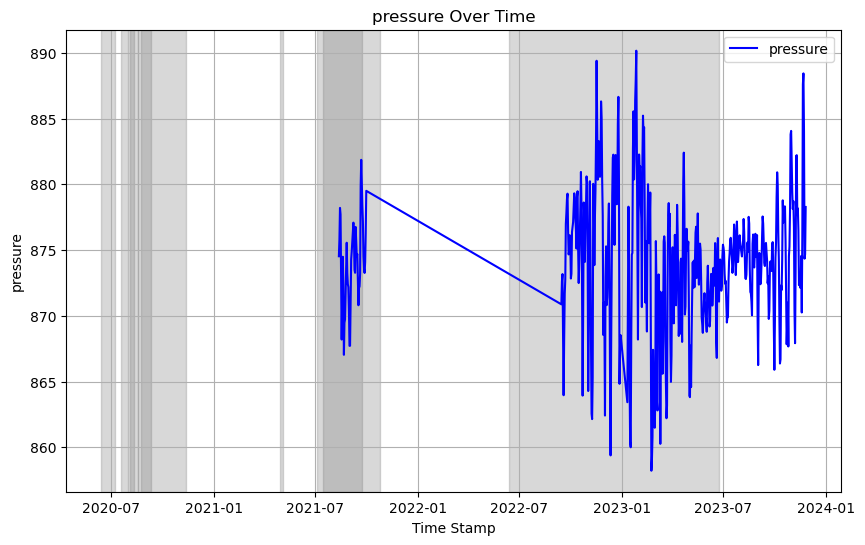

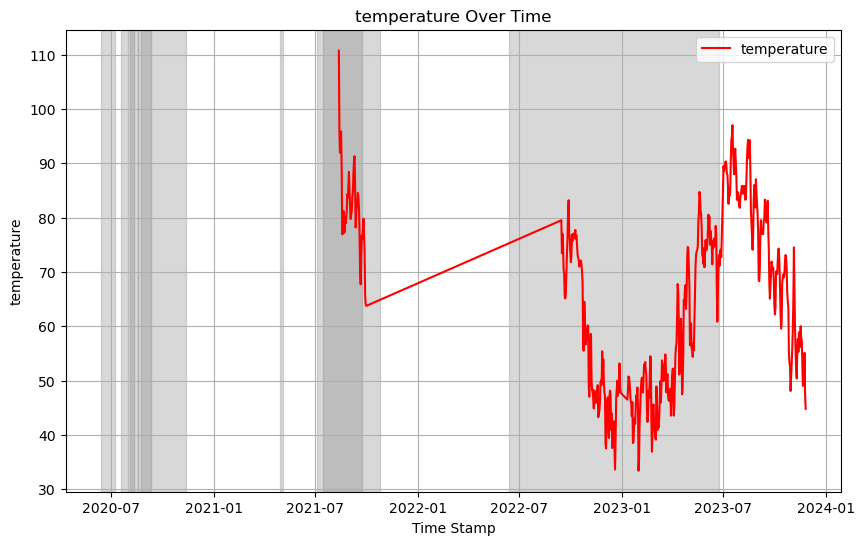

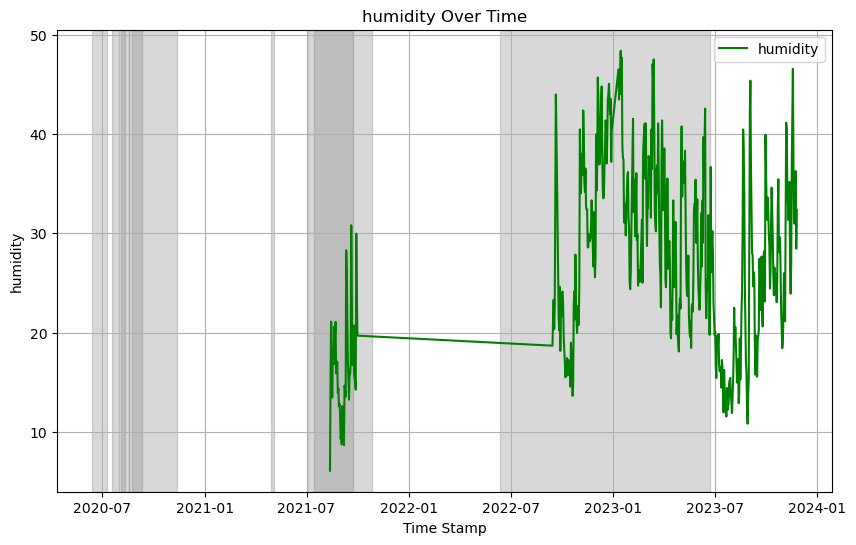

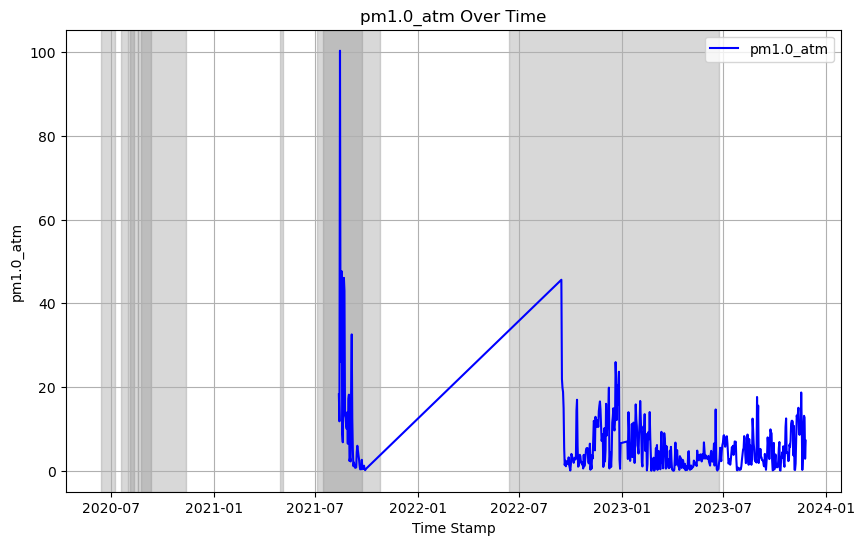

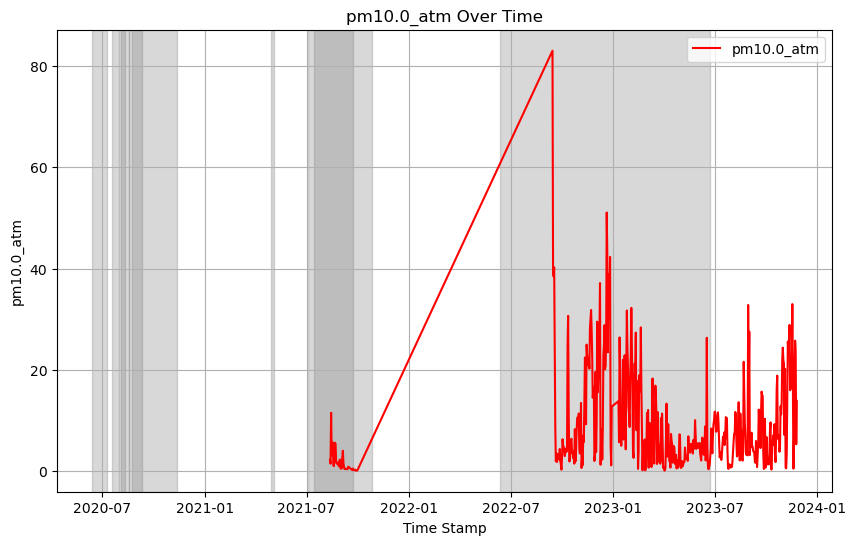

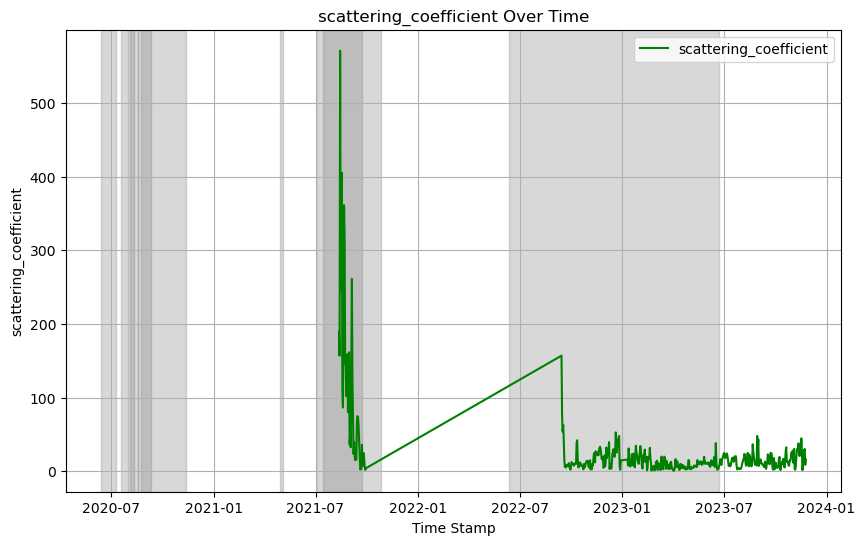

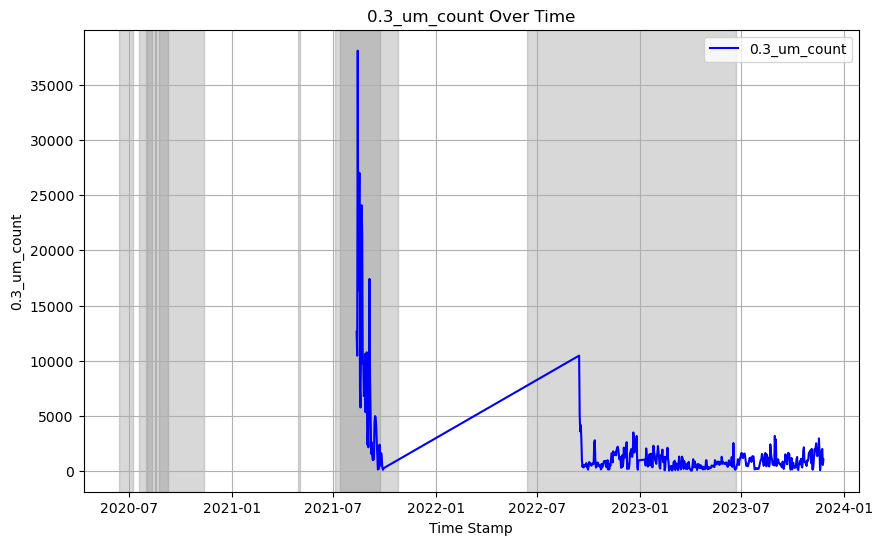

In [143]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 12302
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.3 14335 --> Great (Berryessa/ Santa Paula)

In [157]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 14335
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data2 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")

In [158]:
# Fill in missing values with 0
for entry in data2['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data2['data'], columns=data2['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-08-22    49.867       77.158   972.770        5.8   
1 2023-06-20    36.626       67.015   974.821        0.6   
2 2023-08-24    37.442       83.419   968.955        5.5   
3 2023-06-07    61.483       62.625   970.153        2.1   
4 2023-07-03    28.918       82.104   968.739        3.2   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    16.3         131.8     1088.2480        1.3510   
1                     2.3         306.8      150.6435        0.2430   
2                    17.3         127.0     1150.1925        0.9675   
3                     7.0         211.9      467.1080        0.6015   
4                    10.0         177.0      668.4225        1.0130   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     5.4805     8.7025      8.7025      9.6830  
1     0.0465     0.1965      0.1965      0.3675  
2     5.8010     8.4445      8.4445      9.1510  
3     1.8715     2.7575      2.7575      3.1820  
4     2.9075     4.5010      4.5010      5.2285

In [147]:
df_2019 = df

In [150]:
df_2020 = df

In [153]:
df_2021 = df

In [156]:
df_2022 = df

In [159]:
df_2023 = df

In [160]:
# List of DataFrames
dfs = [df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1637, 13)

In [161]:
df = combined_df

In [162]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/14335.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

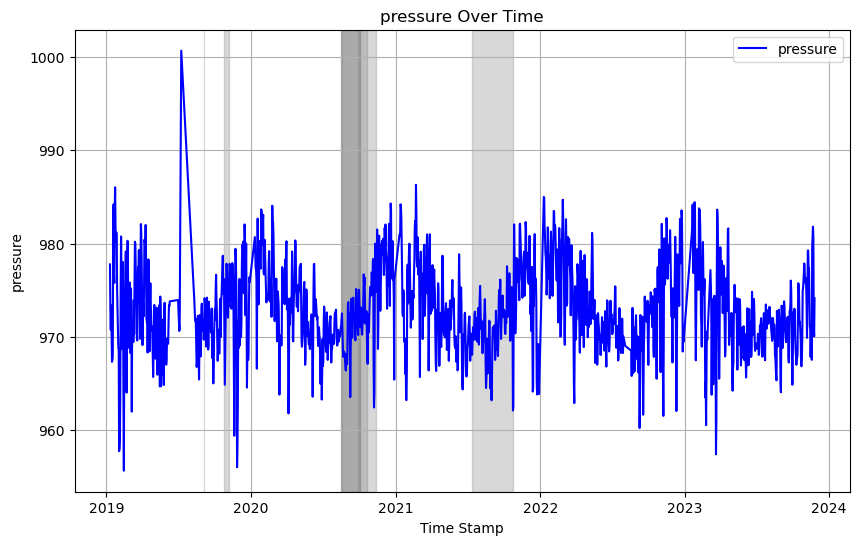

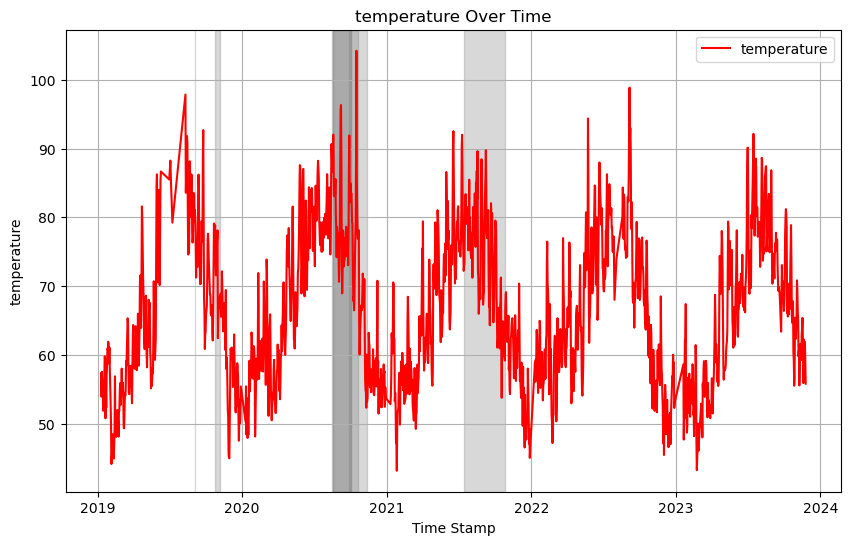

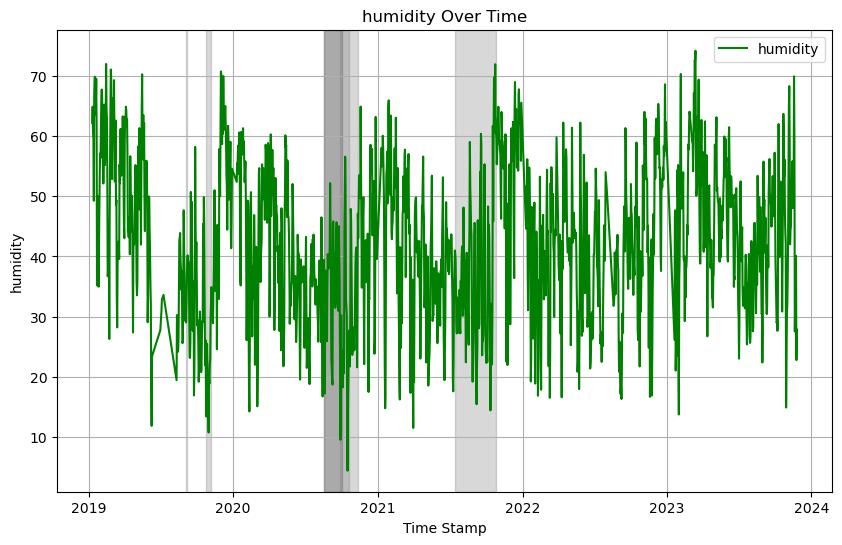

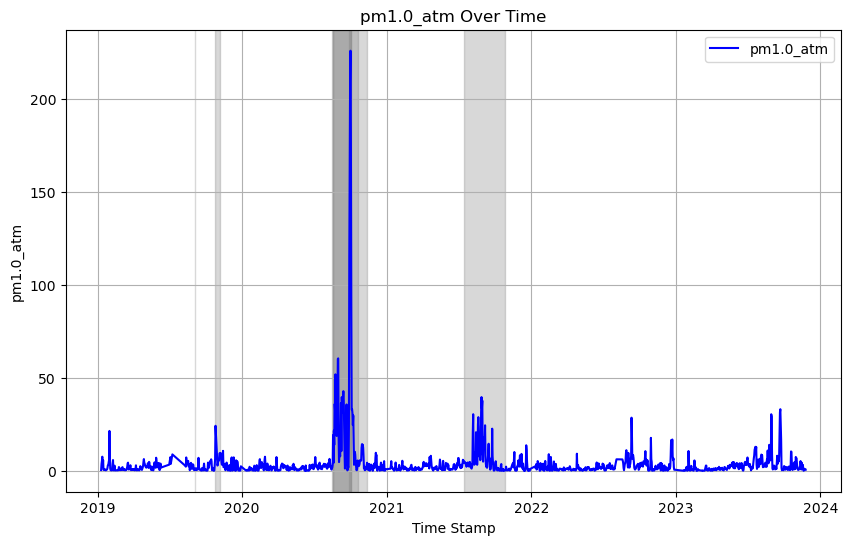

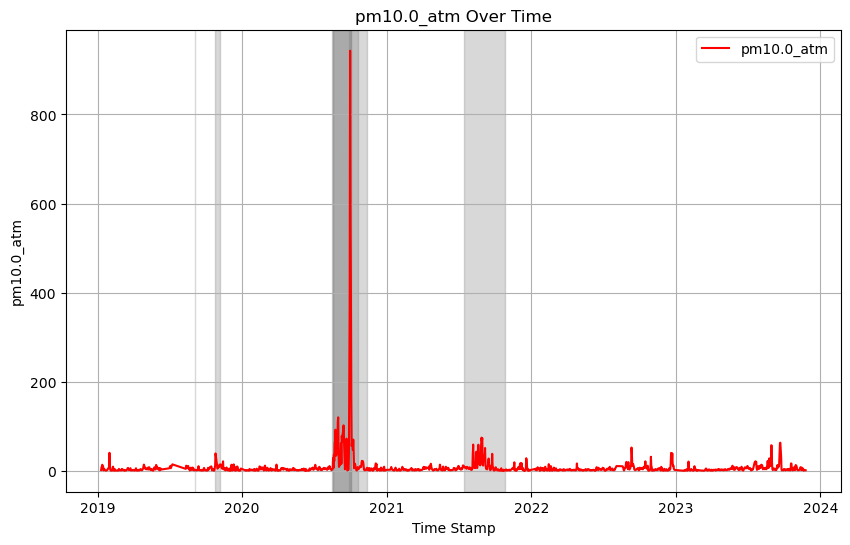

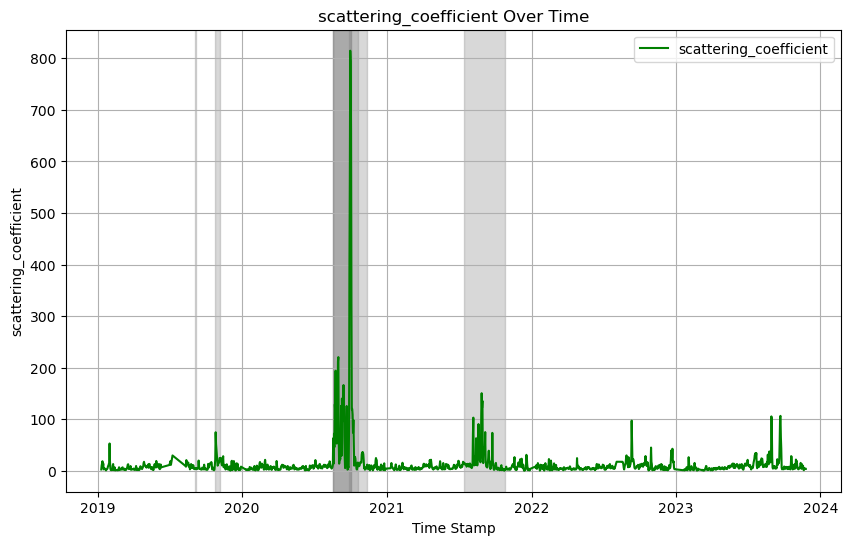

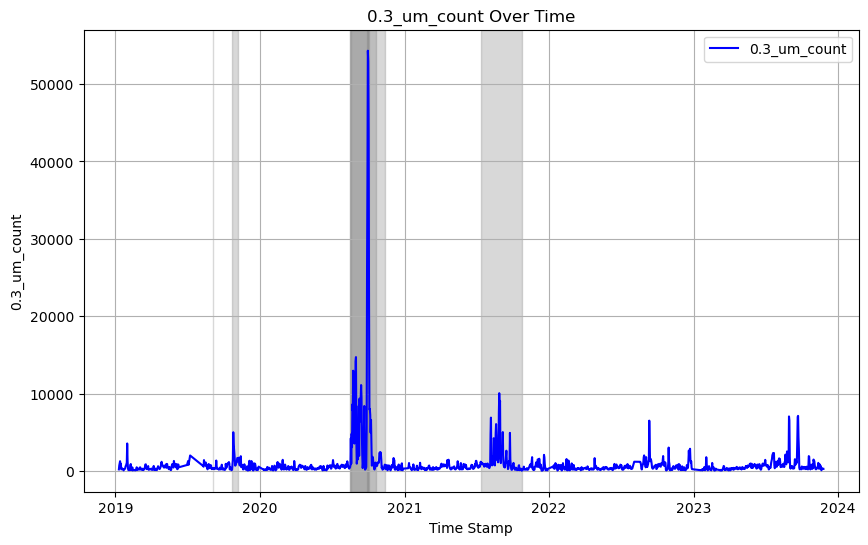

In [163]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 14335
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.4 18557 --> GREAT but some 0 val for temp/pressure (South of lake tahoe)


In [179]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 18557
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2018-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2018-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")

In [180]:
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2018-11-06    23.882       75.399   841.156       29.7   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    64.3          44.8       4285.07         6.239   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0      6.239    35.9395     53.5335      2.6905

In [166]:
df_2019 = df

In [169]:
df_2020 = df

In [172]:
df_2021 = df

In [175]:
df_2022 = df

In [178]:
df_2023 = df

In [181]:
# List of DataFrames
dfs = [df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1563, 13)

In [182]:
df = combined_df

In [183]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/18557.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

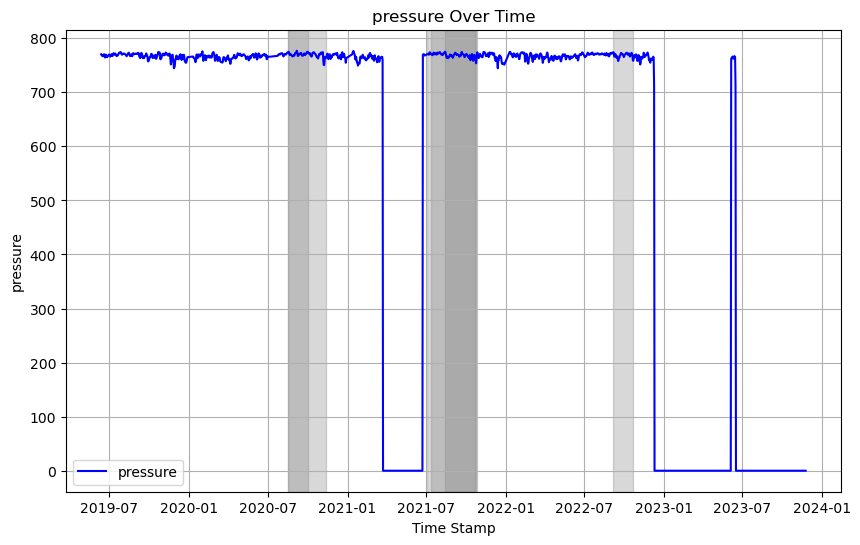

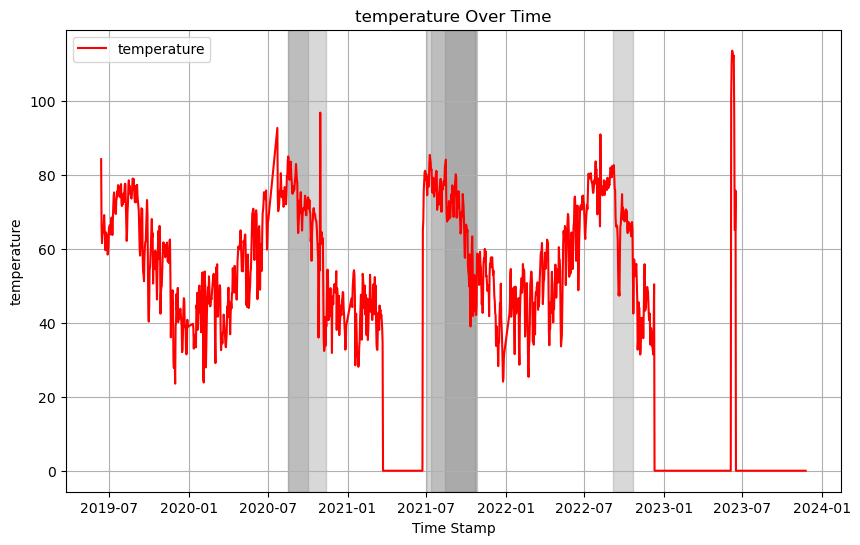

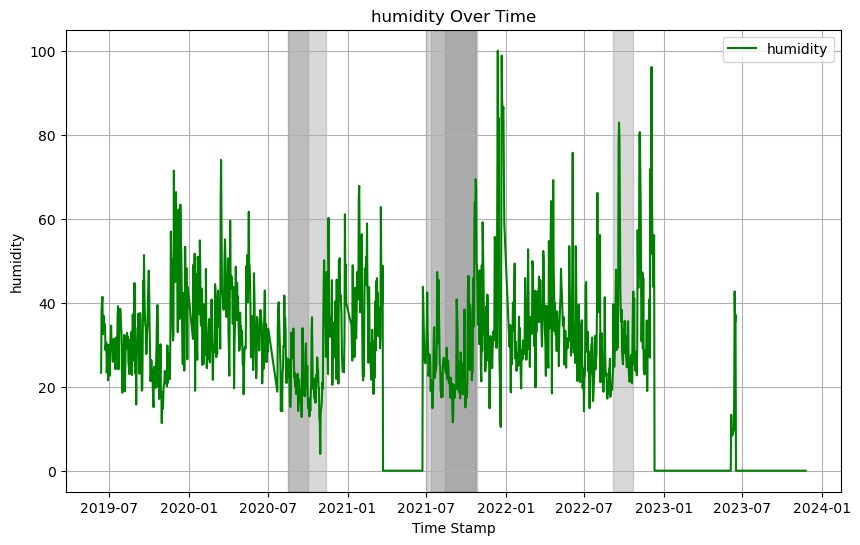

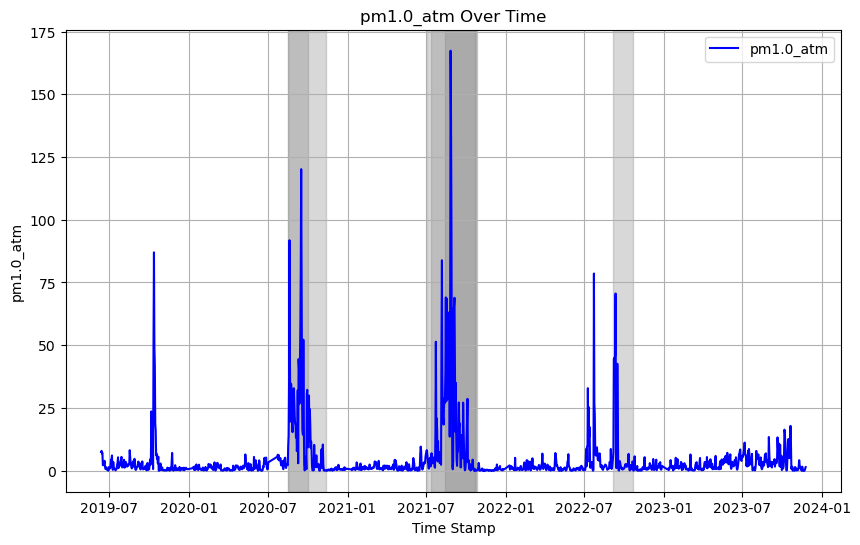

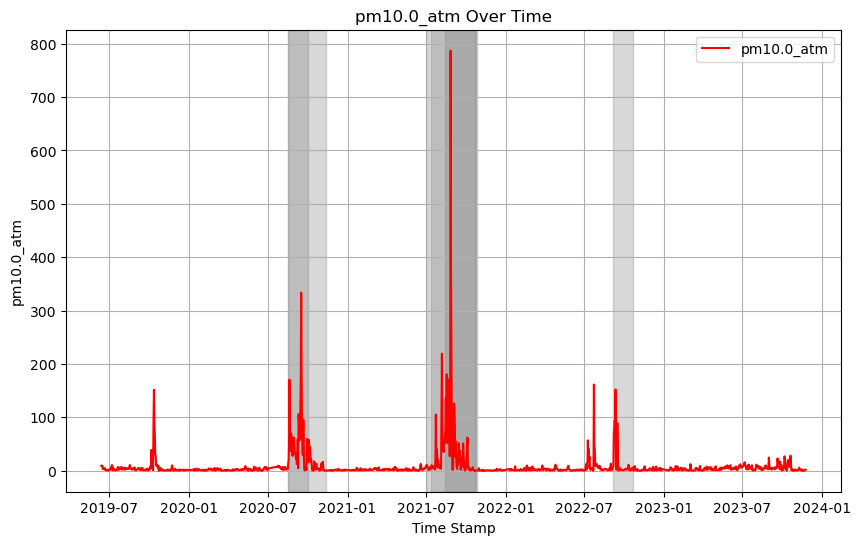

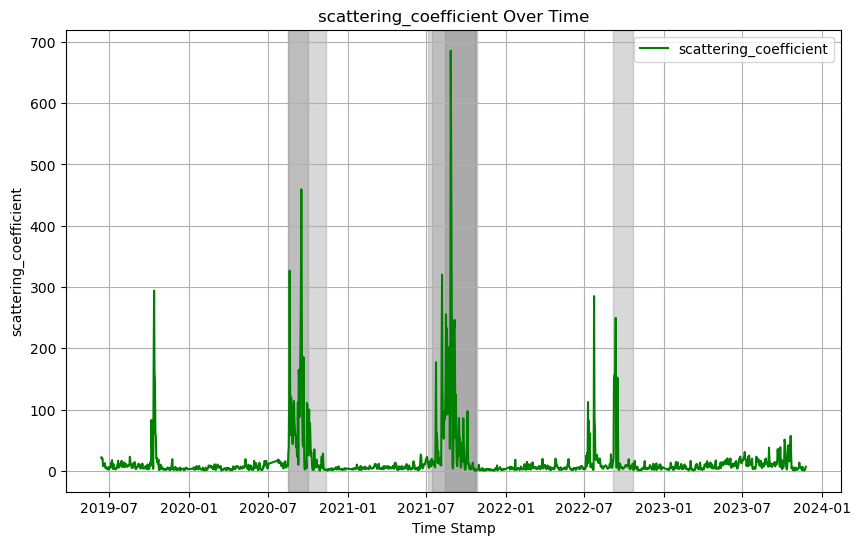

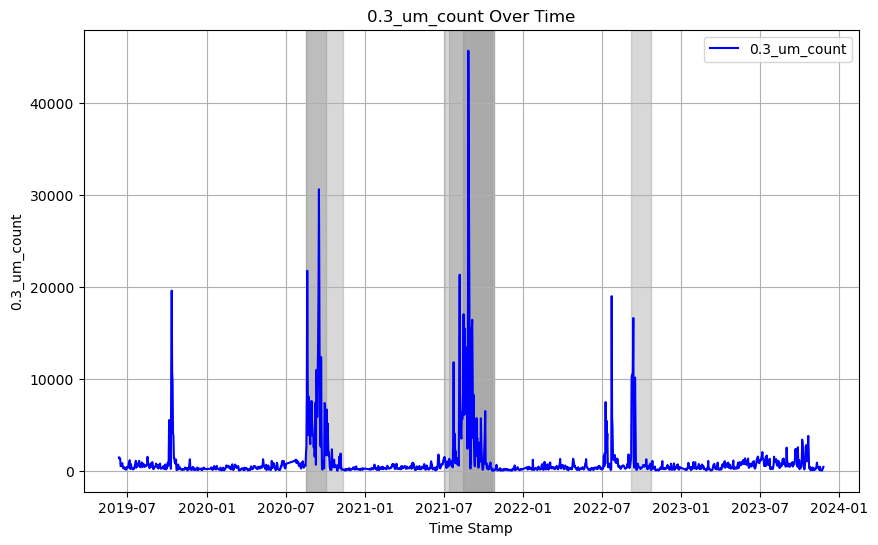

In [184]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 18557
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.5 34275 --> Great (Berryessa)
## Alternative: 37393 have not tried but supposed to be similar

In [194]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 34275
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2018-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2018-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

Empty DataFrame
Columns: [time_stamp, humidity, temperature, pressure, pm2.5_alt, scattering_coefficient, visual_range, 0.3_um_count, 5.0_um_count, pm1.0_atm, pm2.5_atm, pm2.5_cf_1, pm10.0_atm]
Index: []

In [186]:
df_2019 = df

In [188]:
df_2020 = df

In [190]:
df_2021 = df

In [192]:
df_2022 = df

In [195]:
# List of DataFrames
dfs = [df_2019, df_2020, df_2021, df_2022]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1022, 13)

In [196]:
df = combined_df

In [197]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/34275.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

In [215]:
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/34275.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0  2019-11-21    27.823       69.482   998.646        1.1   
1  2019-12-18    41.673       64.642  1008.118        3.0   
2  2019-11-28    38.353       60.849   994.007        1.2   
3  2019-11-29    34.957       60.621   998.032        1.6   
4  2019-11-25    32.310       67.213  1010.019        2.4   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     4.4         255.6      292.1245        0.2450   
1                    11.5         164.1      764.7175        0.5165   
2                     4.4         254.6      295.5990        0.2415   
3                     6.0         227.2      397.9695        0.2775   
4                     8.8         190.1      583.9510        0.4110   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     0.5295     1.0305      1.0305      1.2240  
1     3.1135     4.4935      4.4945      4.9145  
2     0.6335     1.1780      1.1780      1.3655  
3     1.1665     1.8905      1.8905      2.1070  
4     2.1675     3.2695      3.2695      3.6015

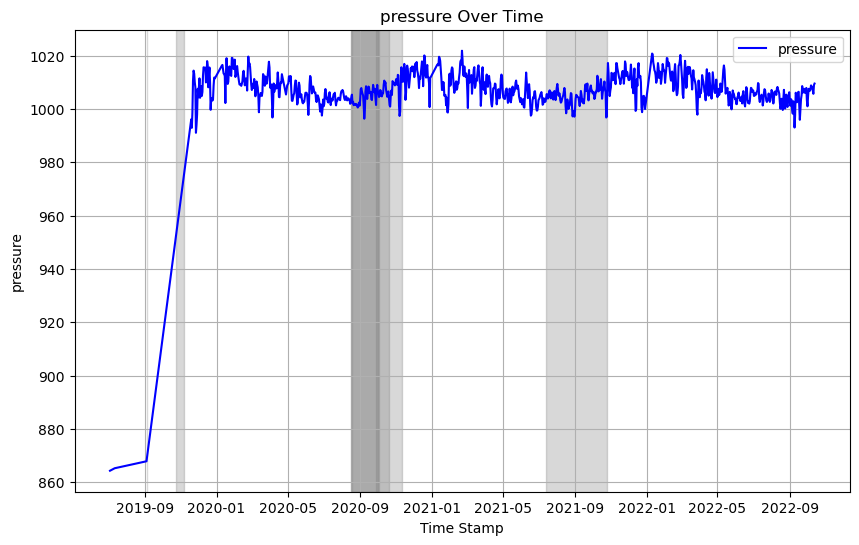

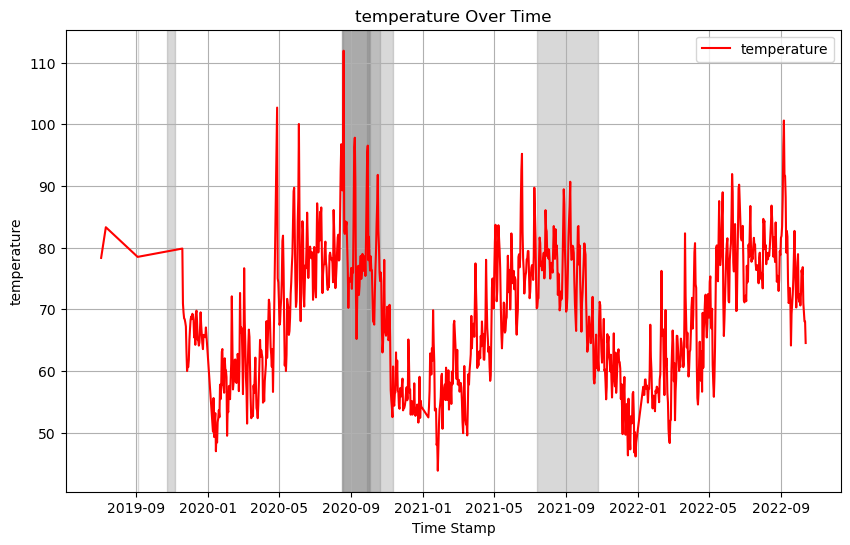

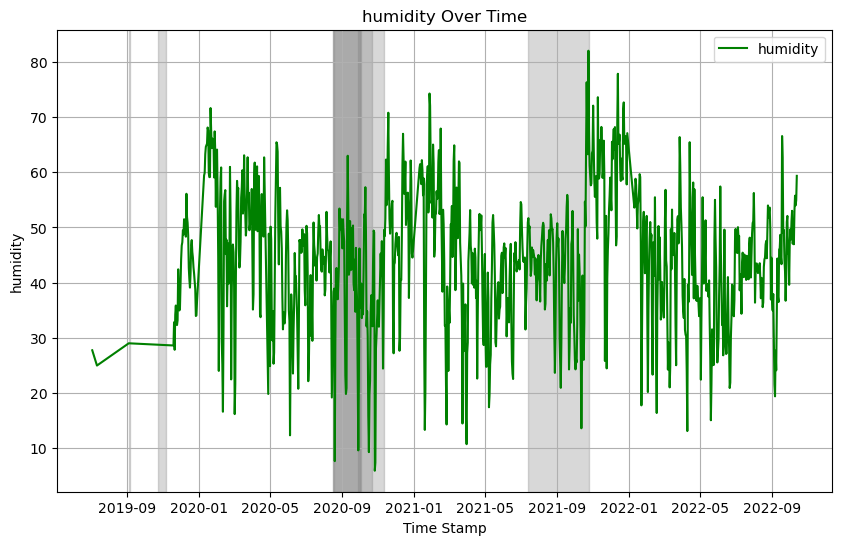

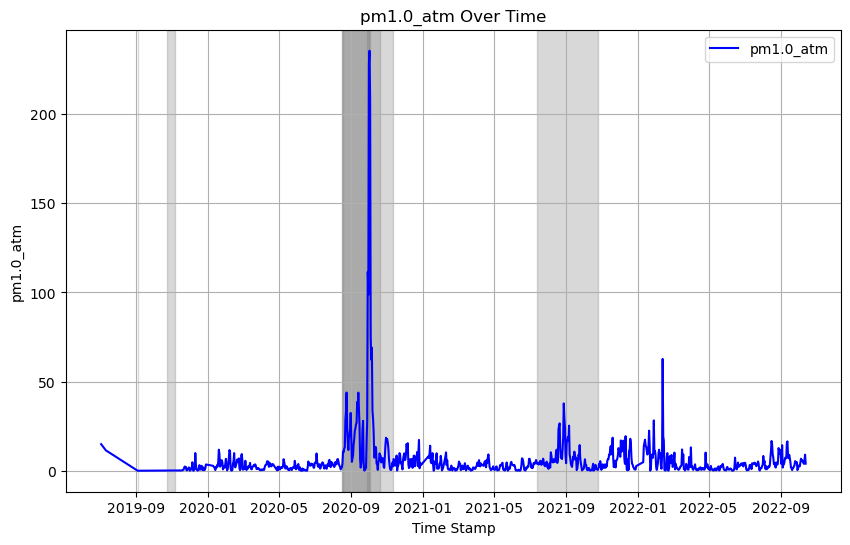

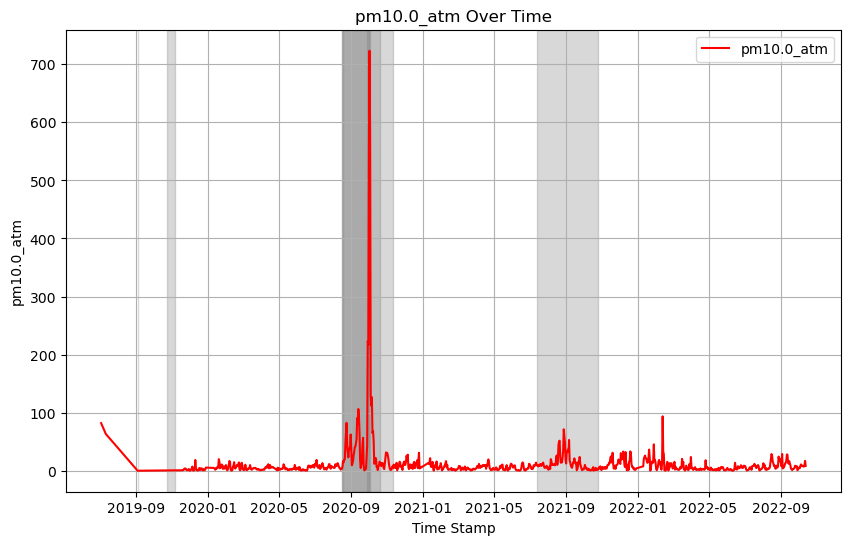

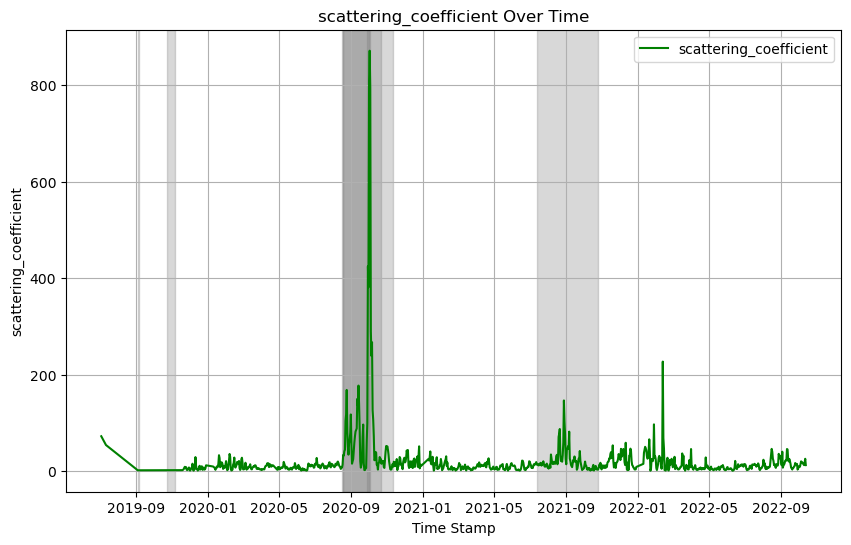

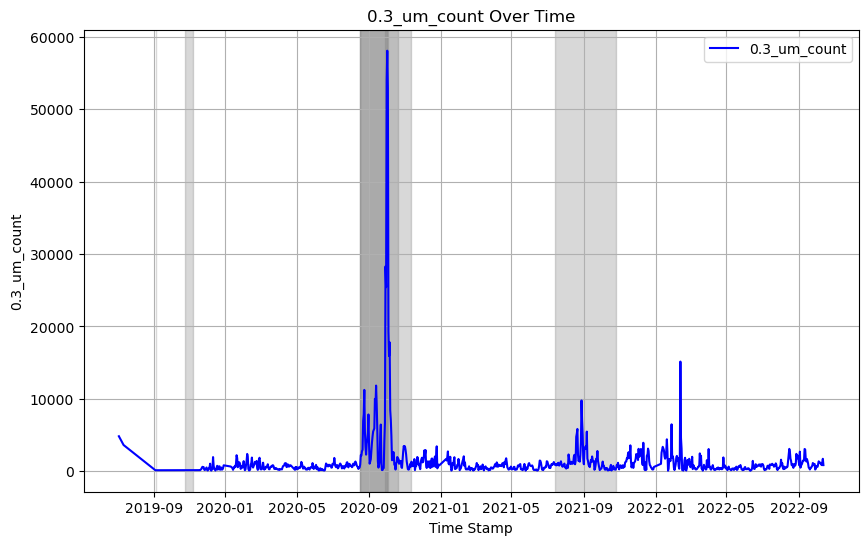

In [216]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 34275
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.6 4478 --> Great, might picked up wildfire not in list? (Berryessa)

In [208]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 4478
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-01-17    49.881       50.014   953.319        2.3   
1 2023-06-29    31.008       85.950   954.350        3.9   
2 2023-07-17    28.063       94.107   953.187        6.2   
3 2023-10-10    59.489       65.944   951.368        1.2   
4 2023-06-22    40.215       69.094   954.309        3.0   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    10.1         176.4      672.9460        0.4475   
1                    14.2         144.3      945.8595        0.5340   
2                    23.3         102.8     1552.1295        0.8920   
3                     4.7         249.6      312.6000        0.2955   
4                    11.3         165.9      750.5390        0.8995   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     3.1820     4.1215      4.1215      4.5335  
1     4.3000     5.7810      5.7855      6.1510  
2     7.4665     9.7470      9.7470     10.3680  
3     0.8410     1.2990      1.2990      1.5015  
4     3.3935     4.8340      4.8340      5.5625

In [199]:
df_2018 = df

In [201]:
df_2019 = df

In [203]:
df_2020 = df

In [205]:
df_2021 = df

In [207]:
df_2022 = df

In [209]:
df_2023 = df

In [211]:
# List of DataFrames
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(2049, 13)

In [212]:
df = combined_df

In [213]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/4478.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

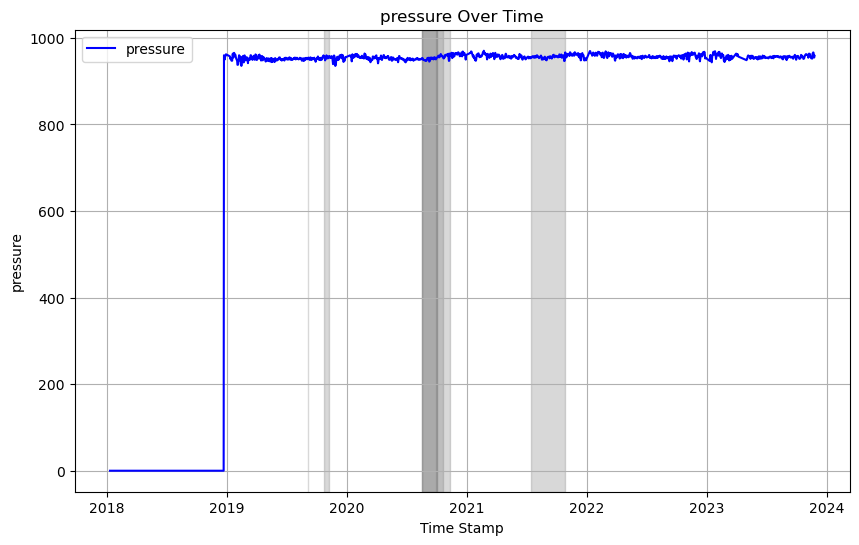

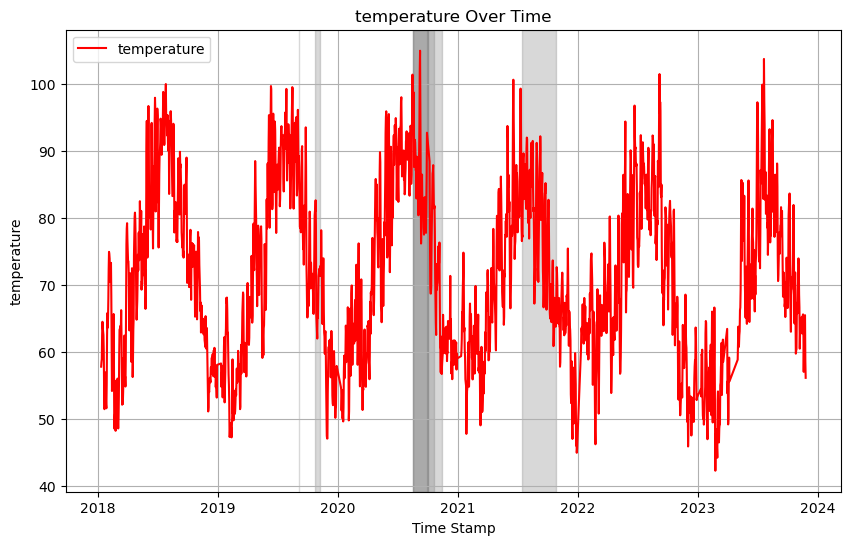

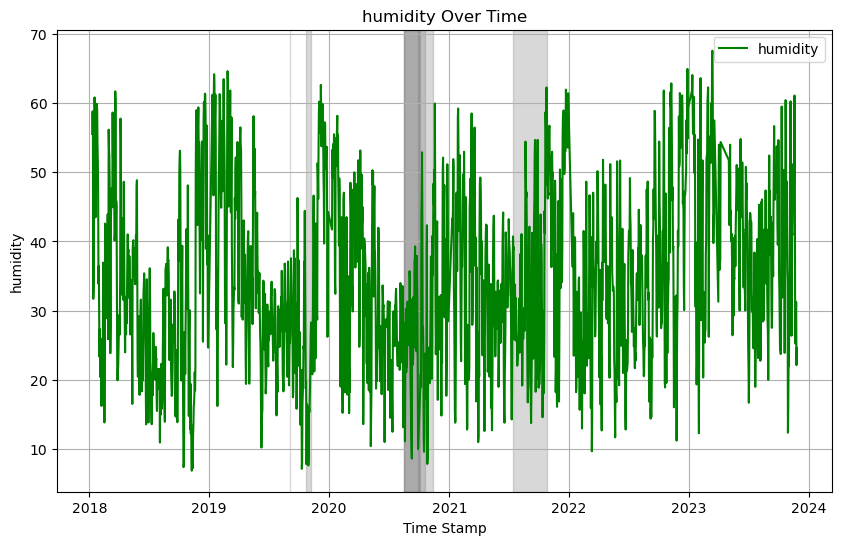

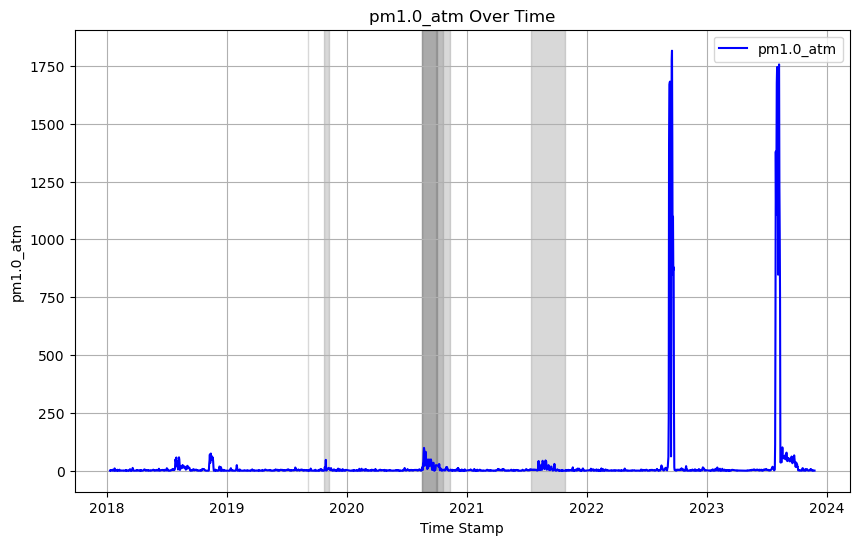

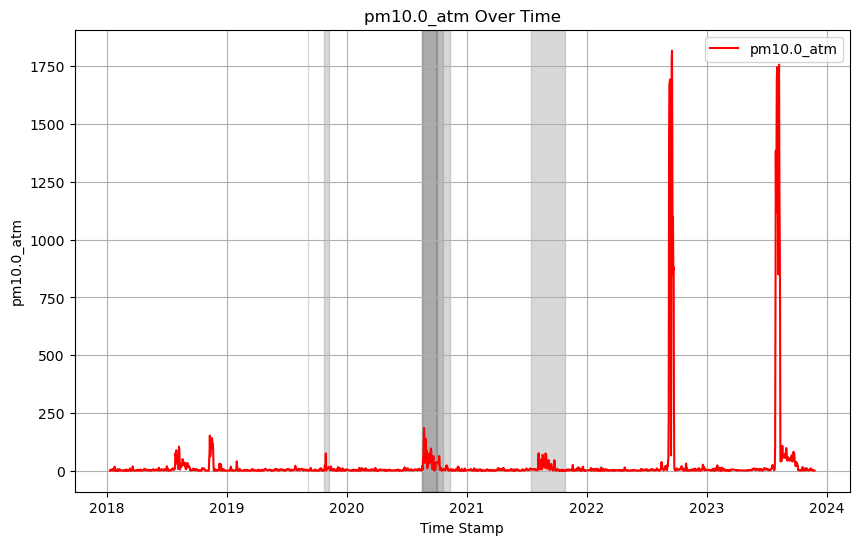

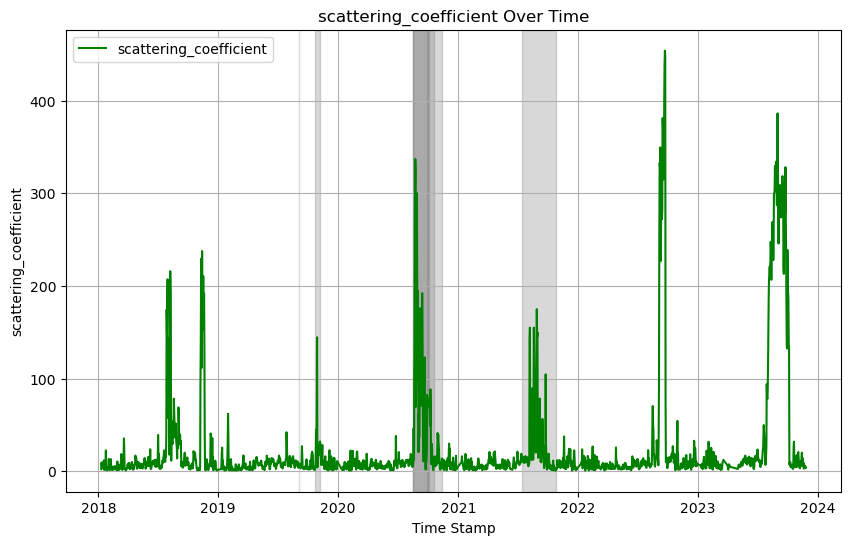

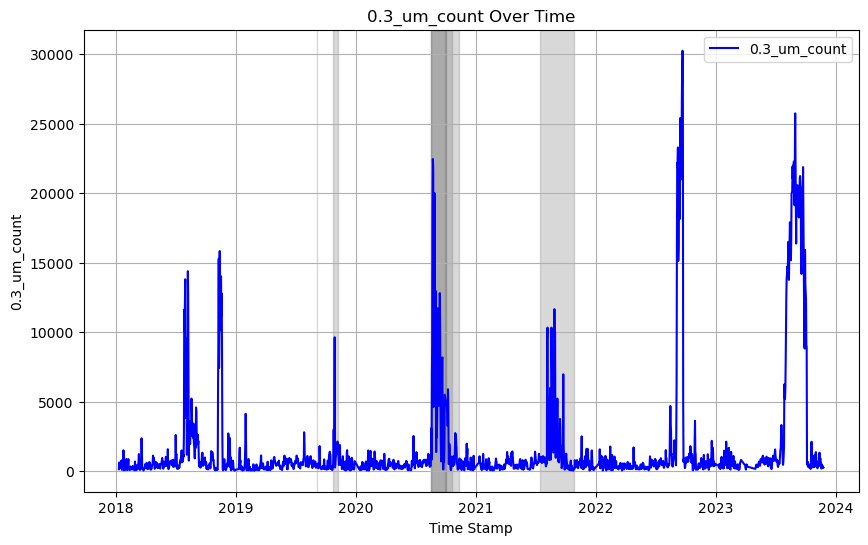

In [214]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 4478
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.7 4091 --> OK, no Temp (Santa Paula)

In [227]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 4091
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-02-17    28.132       55.657   963.712        3.4   
1 2023-04-26    19.297       85.094   958.713        0.4   
2 2023-02-16    25.164       55.343   966.830        0.9   
3 2023-04-01    52.336       53.611   966.914        1.3   
4 2023-03-08    62.883       47.686   962.364        0.6   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    12.9         153.2      858.5270        0.9945   
1                     1.8         319.6      122.3415        0.1240   
2                     3.8         267.2      255.4420        0.2180   
3                     4.8         247.6      319.4335        0.6675   
4                     2.2         309.0      145.6095        0.3530   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     4.1860     5.8640      5.8640       6.647  
1     0.0480     0.1260      0.1260       0.188  
2     0.6970     0.9285      0.9285       1.072  
3     0.8765     1.4935      1.4935       1.946  
4     0.2890     0.5420      0.5420       0.769

In [218]:
df_2018 = df

In [220]:
df_2019 = df

In [222]:
df_2020 = df

In [224]:
df_2021 = df

In [226]:
df_2022 = df

In [228]:
df_2023 = df

In [229]:
# List of DataFrames
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1620, 13)

In [230]:
df = combined_df

In [231]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/4091.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

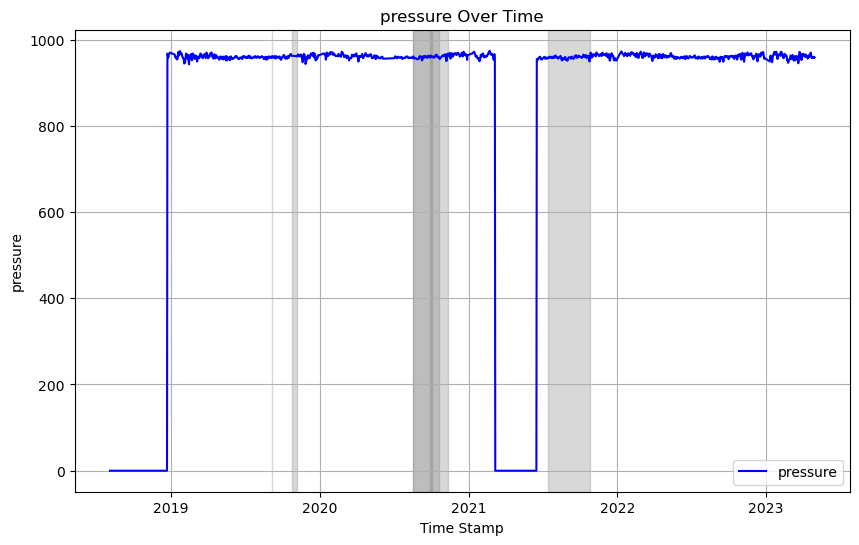

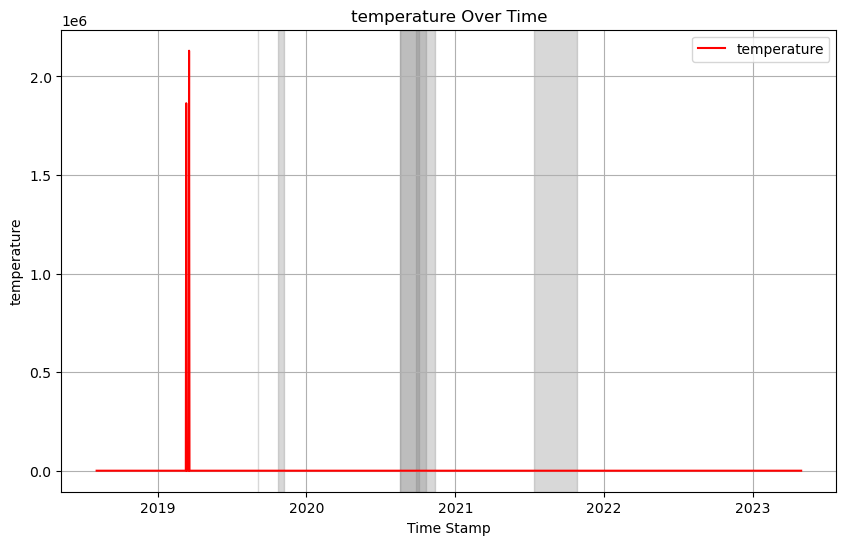

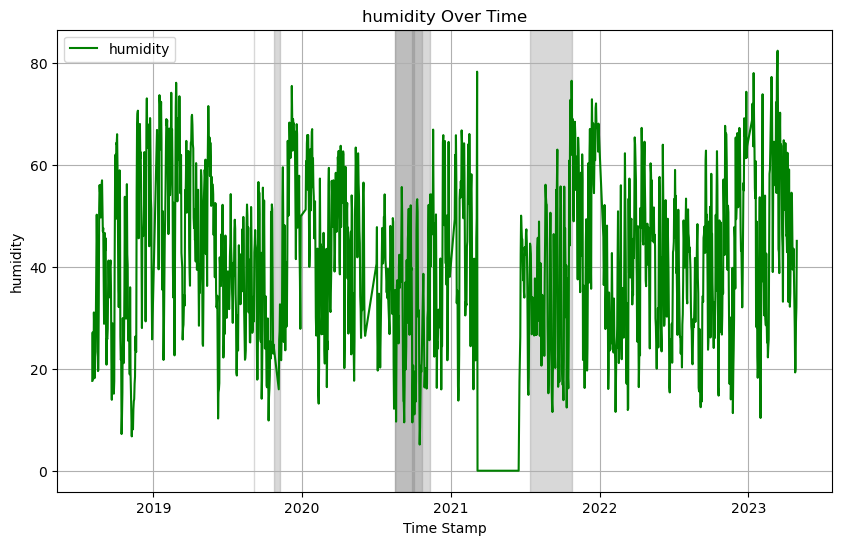

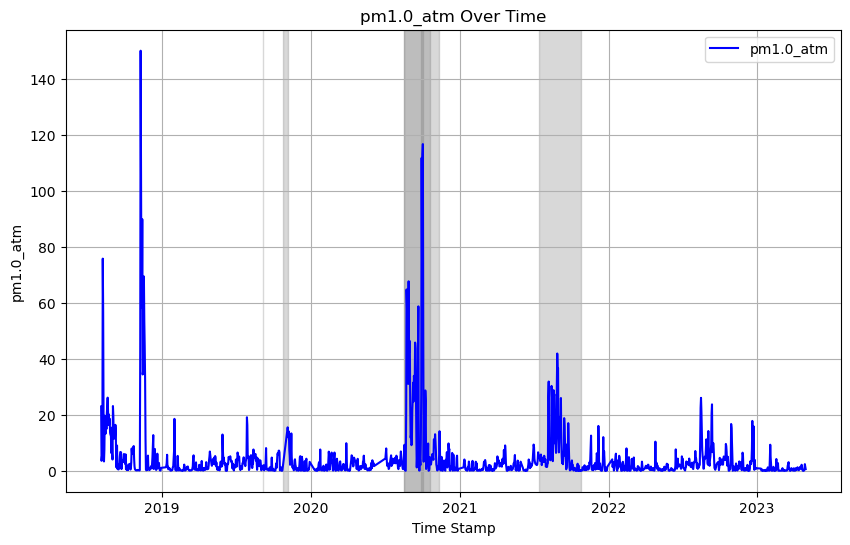

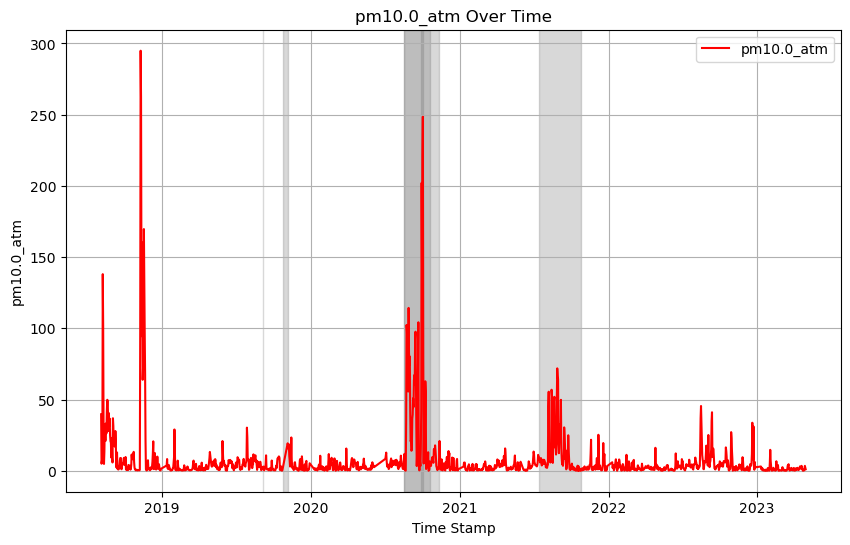

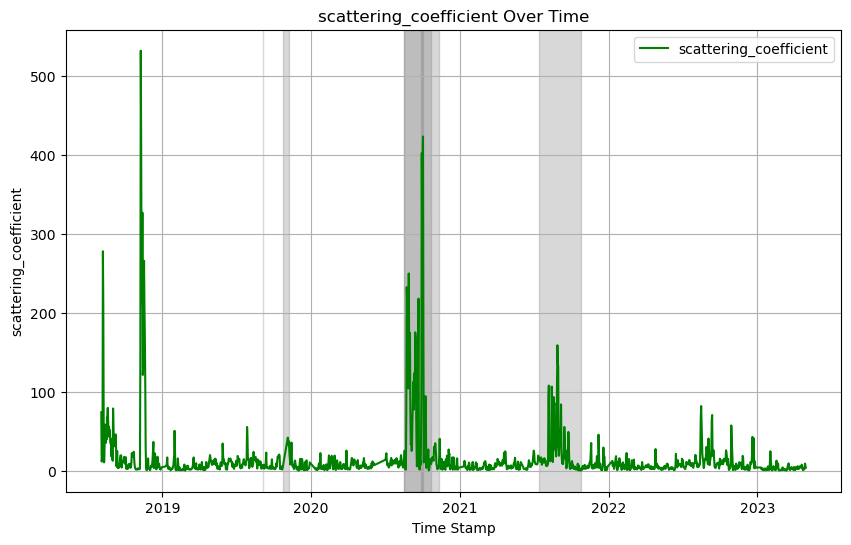

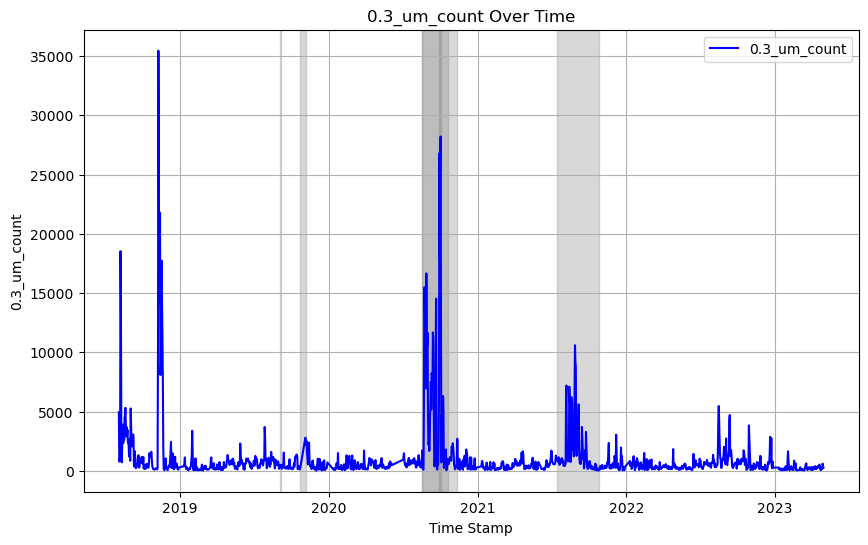

In [232]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 4091
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.8 11846 --> Not so good (HoneyLake)

In [240]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 11846
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-02-10    35.822       52.143   875.016        1.9   
1 2023-01-18    39.759       43.106   870.942        3.9   
2 2023-08-02    13.386       86.219   871.763        0.8   
3 2023-09-21    24.655       67.815   867.227        1.4   
4 2023-10-11    33.754       63.756   863.363        0.2   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     6.2         223.4      414.2005        0.2730   
1                    11.1         167.6      736.9400        0.9205   
2                     2.8         291.7      187.1155        0.0935   
3                     4.7         248.5      316.1700        0.1680   
4                     0.9         352.9       58.3470        0.0325   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     2.2155     3.3495      3.4125      3.6440  
1     4.5490     7.6535      9.0270      8.7770  
2     0.5000     0.8200      0.8200      0.8915  
3     1.3660     1.9875      1.9875      2.1260  
4     0.0620     0.1115      0.1115      0.1325

In [237]:
df_2021 = df

In [239]:
df_2022 = df

In [241]:
df_2023 = df

In [242]:
# List of DataFrames
dfs = [df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(484, 13)

In [243]:
df = combined_df

In [244]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/11846.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

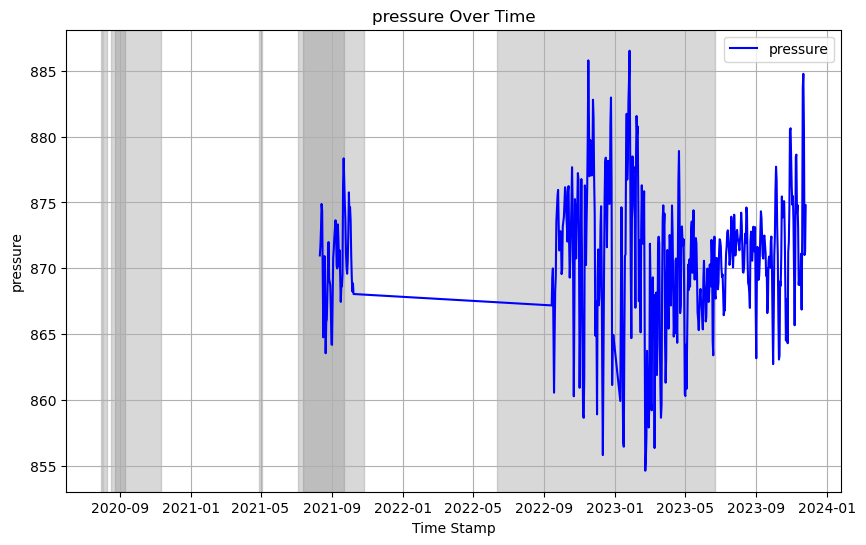

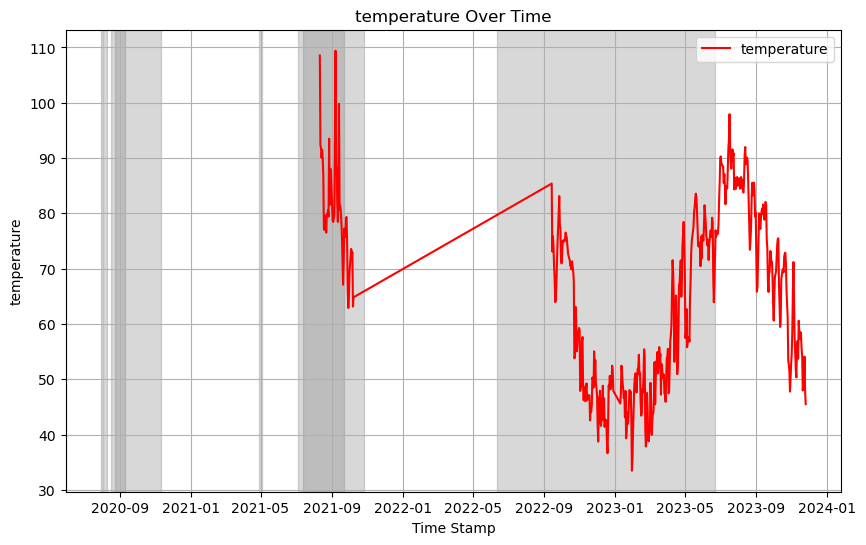

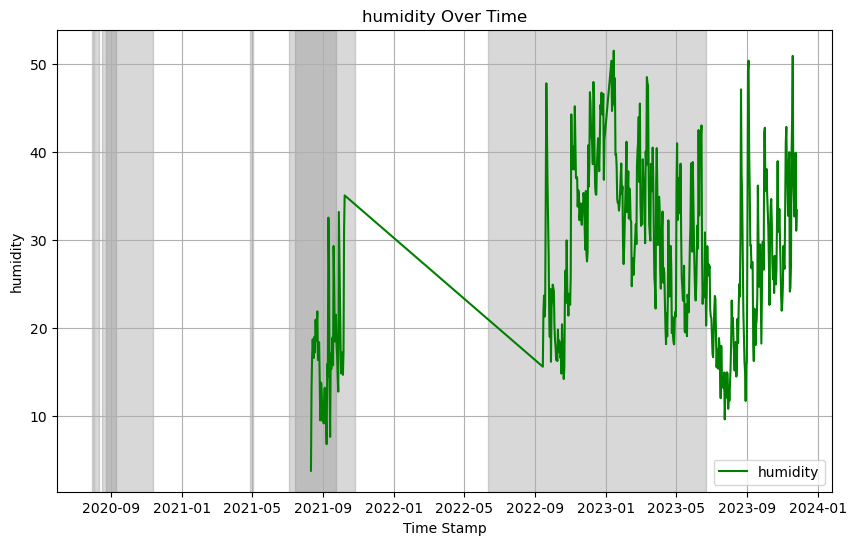

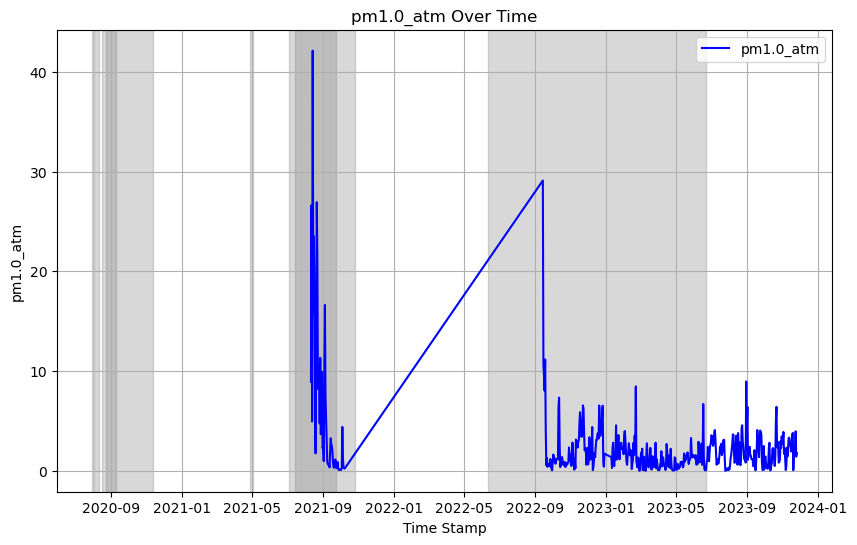

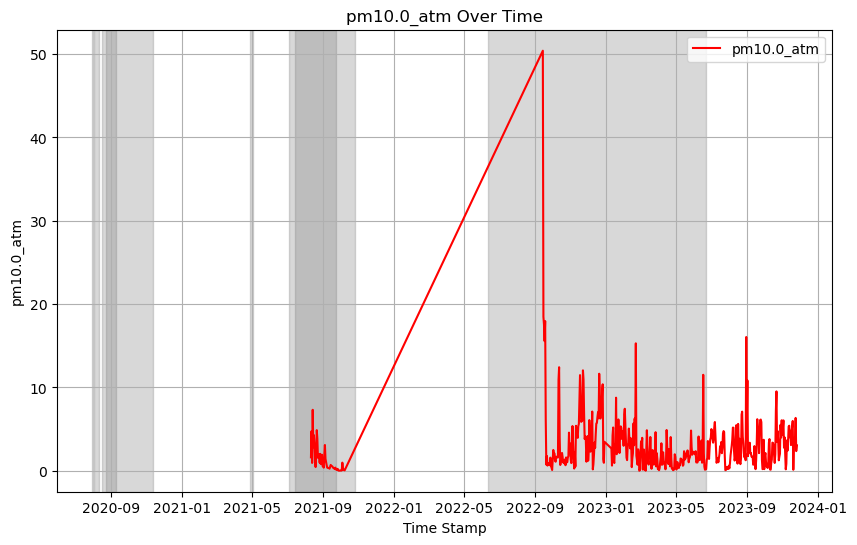

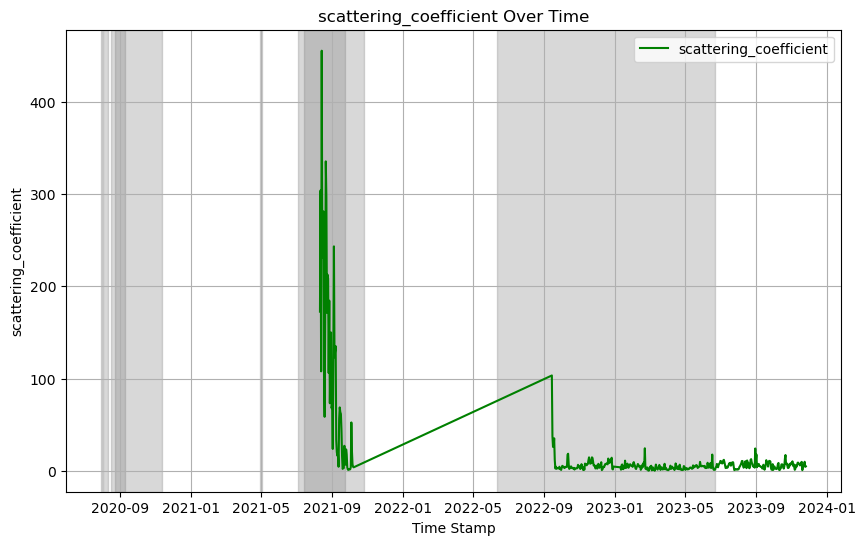

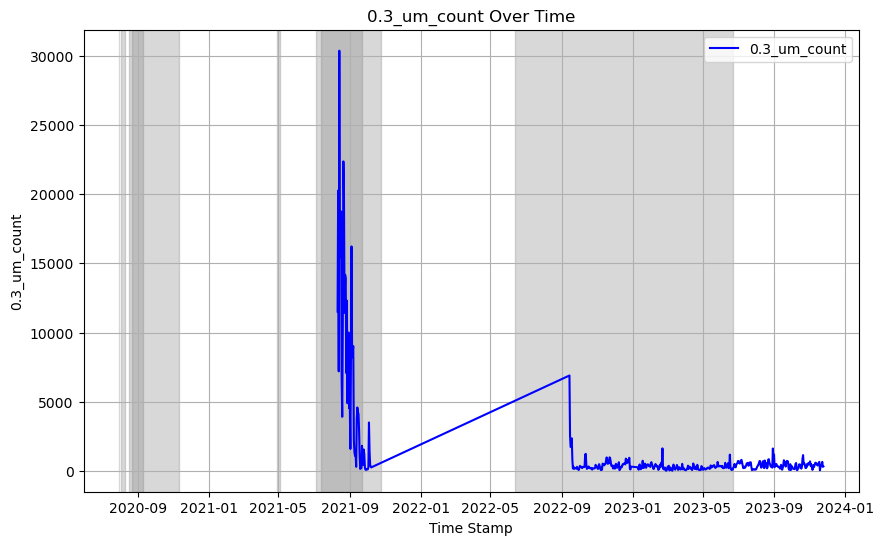

In [245]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 11846
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.9 66849 --> OK, one outlier, maybe the others are better (Berryessa)
### Alternative: 67199, 63223, 62357, 47673

In [253]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 66849
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-07-18    30.429       86.768   951.723        1.0   
1 2023-08-27    30.947       85.401   955.585        1.4   
2 2023-04-19    26.637       78.357   958.564        0.3   
3 2023-11-22    28.432       82.408   962.902        1.9   
4 2023-04-25    30.618       79.075   953.221        0.5   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     3.2         282.4       211.696         0.350   
1                     4.1         261.9       271.745         0.429   
2                     1.0         347.8        67.331         0.121   
3                     5.1         241.9       340.026         1.029   
4                     1.7         323.1       114.958         0.243   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0      0.327      0.817       0.817       1.037  
1      0.874      1.641       1.674       1.934  
2      0.008      0.059       0.059       0.111  
3      1.255      2.814       2.919       3.472  
4      0.034      0.227       0.227       0.364

In [248]:
df_2020 = df

In [250]:
df_2021 = df

In [252]:
df_2022 = df

In [254]:
df_2023 = df

In [255]:
# List of DataFrames
dfs = [df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1114, 13)

In [256]:
df = combined_df

In [257]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/66849.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

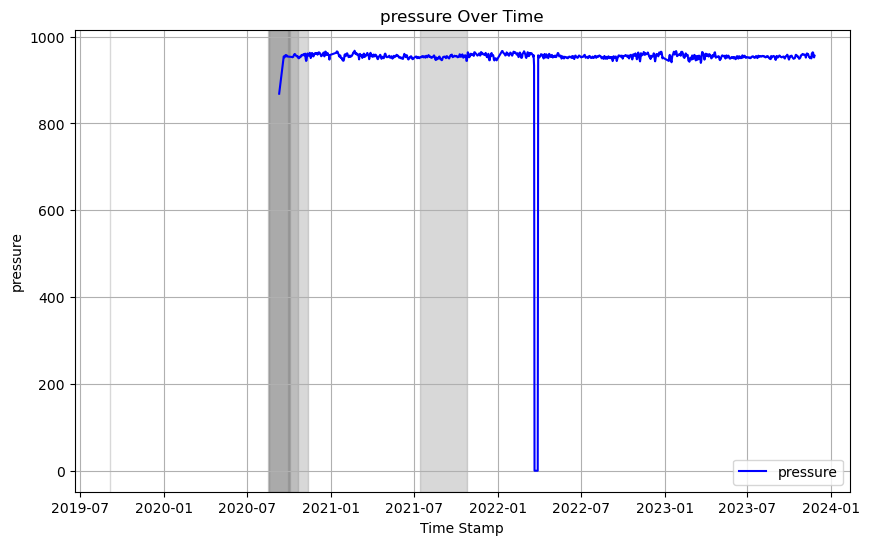

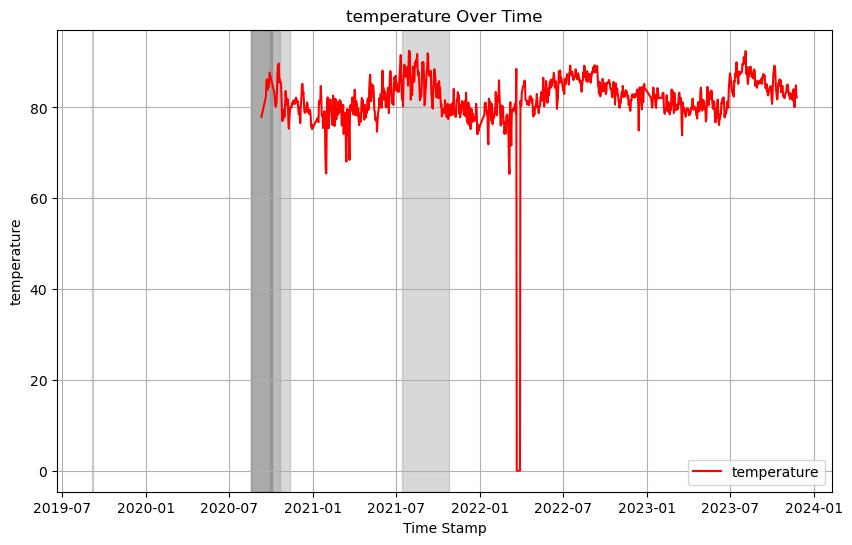

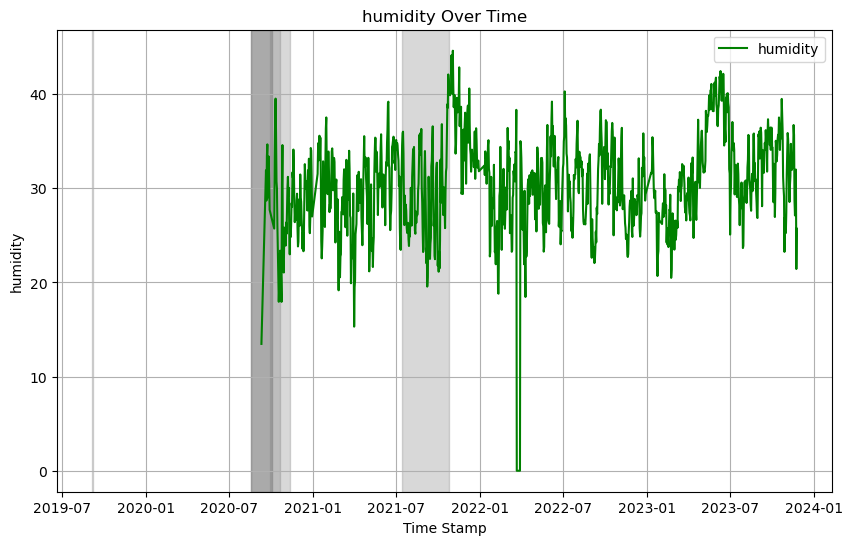

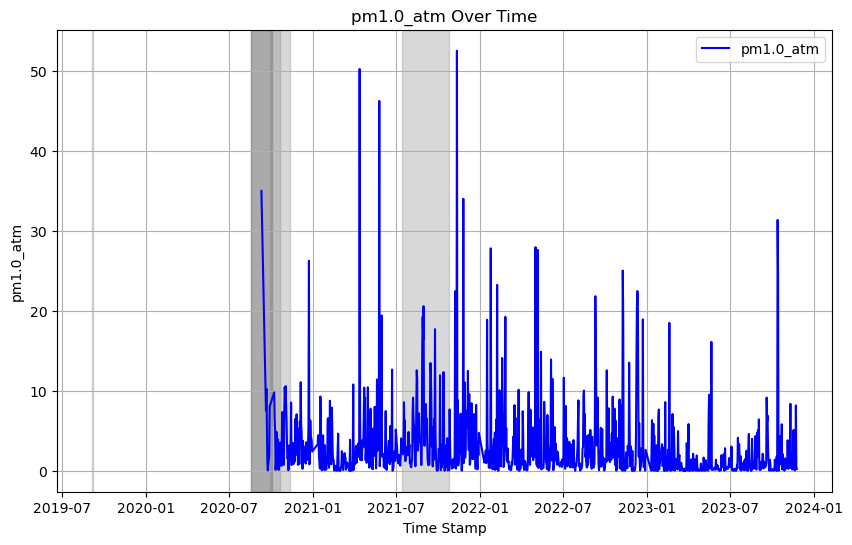

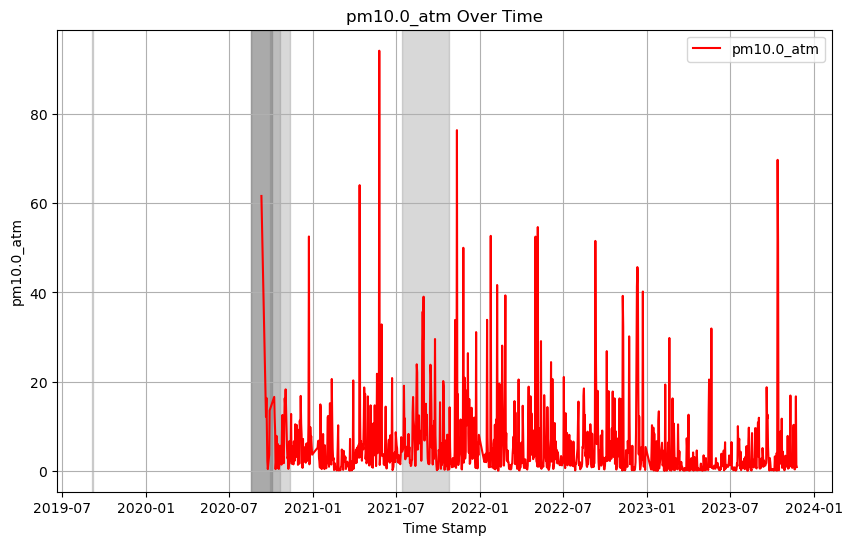

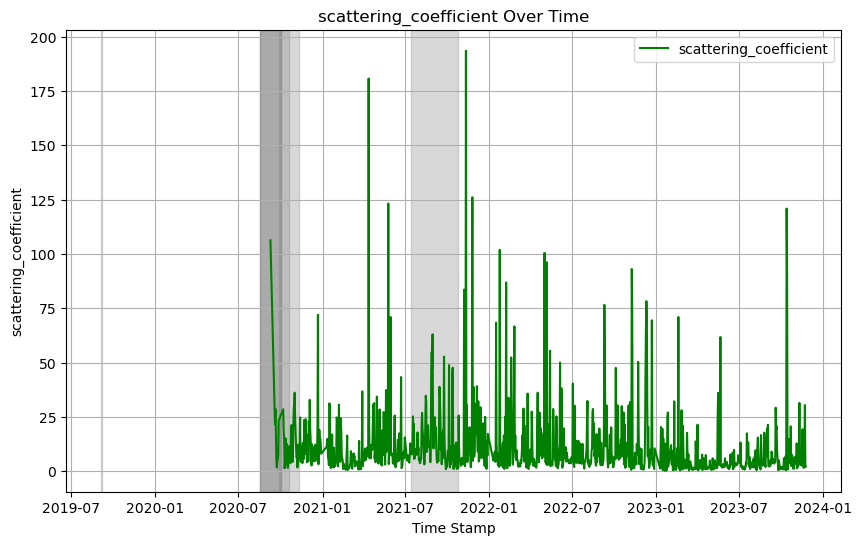

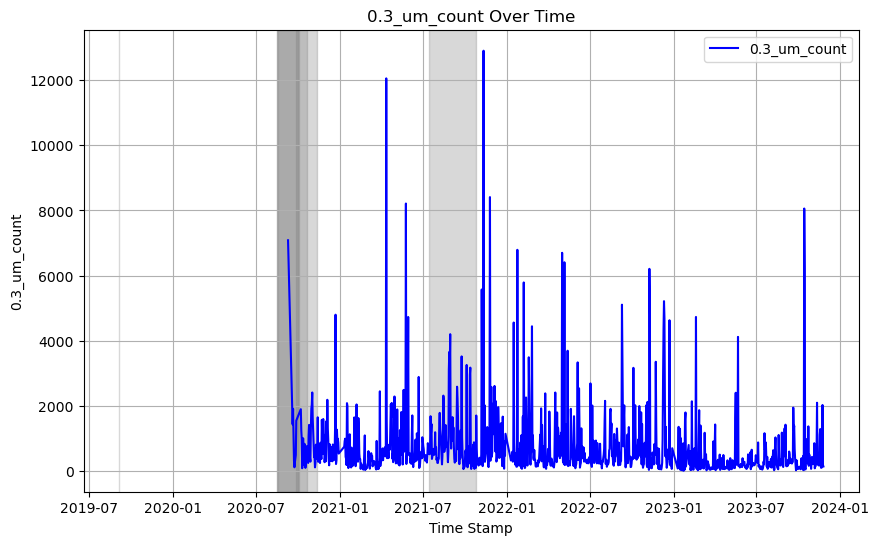

In [258]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 66849
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.10 47673 --> OK (Loyalton) 

In [266]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 47673
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-06-21    32.075       58.976   851.035        1.8   
1 2023-04-30    34.029       65.697   847.916        3.0   
2 2023-10-01    53.163       52.849   844.646        2.7   
3 2023-07-13    25.378       72.760   853.085        1.7   
4 2023-09-14    30.165       69.582   851.726        3.6   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                     9.5         181.7      636.5640        0.3235   
1                    13.5         148.8      900.4195        0.5620   
2                     9.9         178.1      661.0800        0.4410   
3                     7.4         206.5      493.7725        0.3545   
4                    13.2         150.7      881.7900        0.5785   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     1.4560     2.1295      2.2440      2.4005  
1     3.7180     4.8325      4.8385      5.2630  
2     2.6755     4.0270      4.1065      4.4145  
3     1.3800     2.0290      2.0405      2.2995  
4     3.7620     5.5625      5.6045      6.0165

In [261]:
df_2020 = df

In [263]:
df_2021 = df

In [265]:
df_2022 = df

In [267]:
df_2023 = df

In [268]:
# List of DataFrames
dfs = [df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(870, 13)

In [269]:
df = combined_df

In [270]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/47673.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

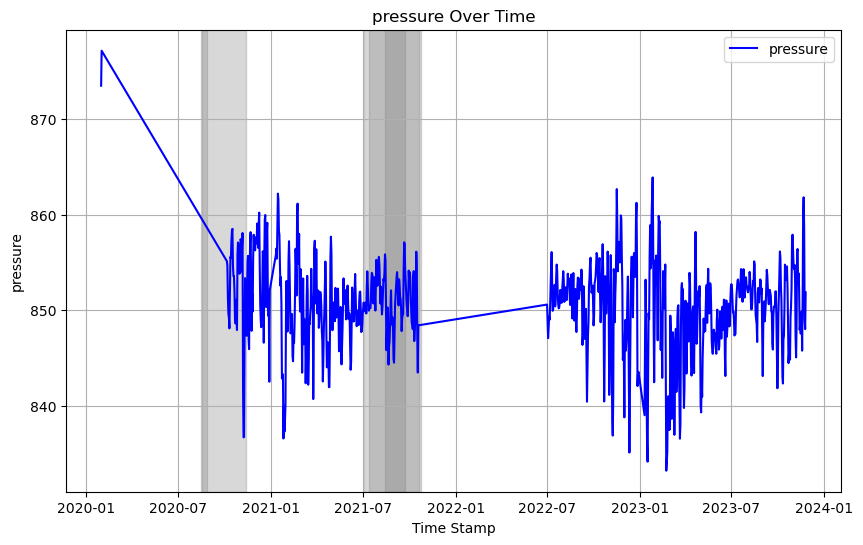

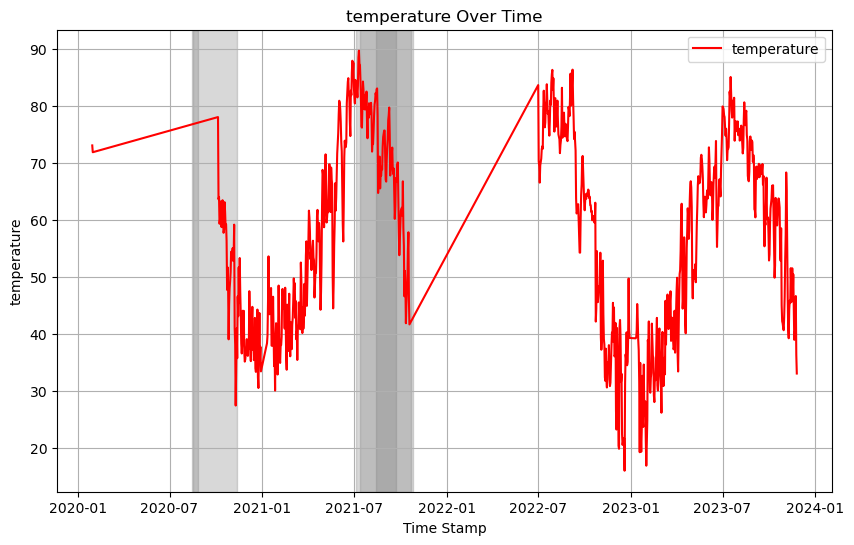

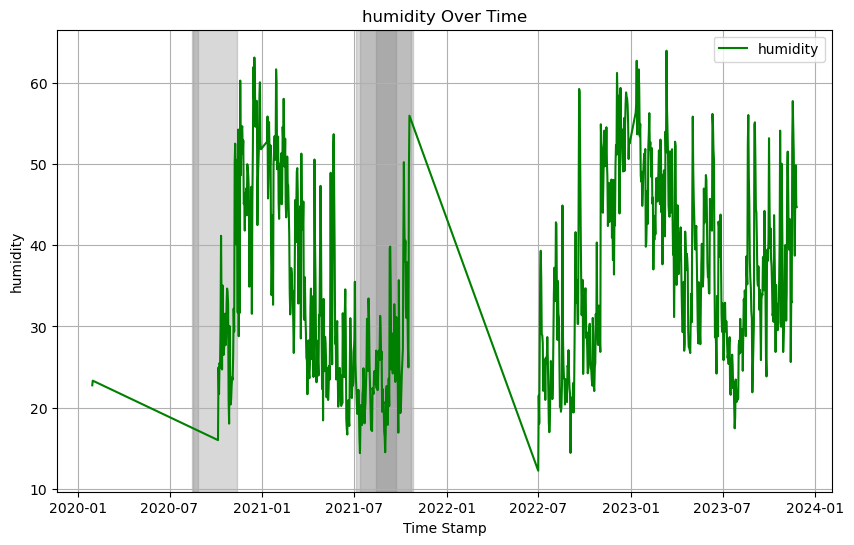

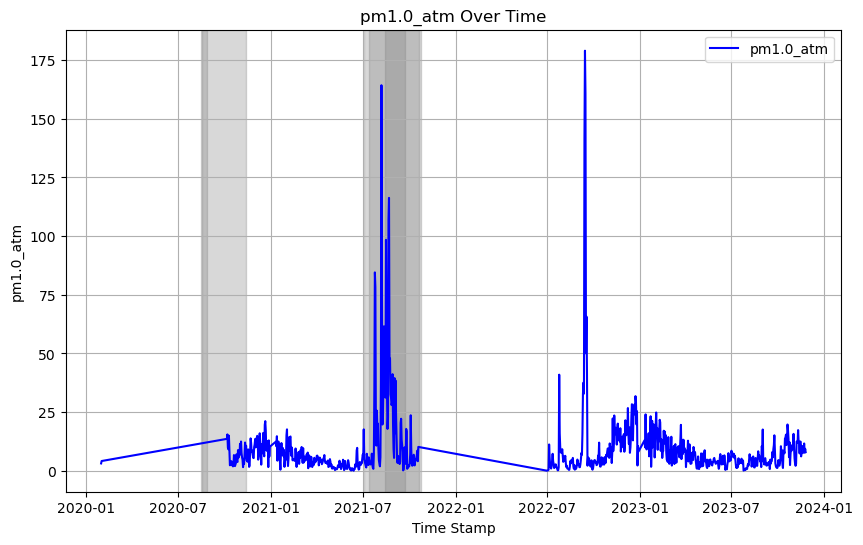

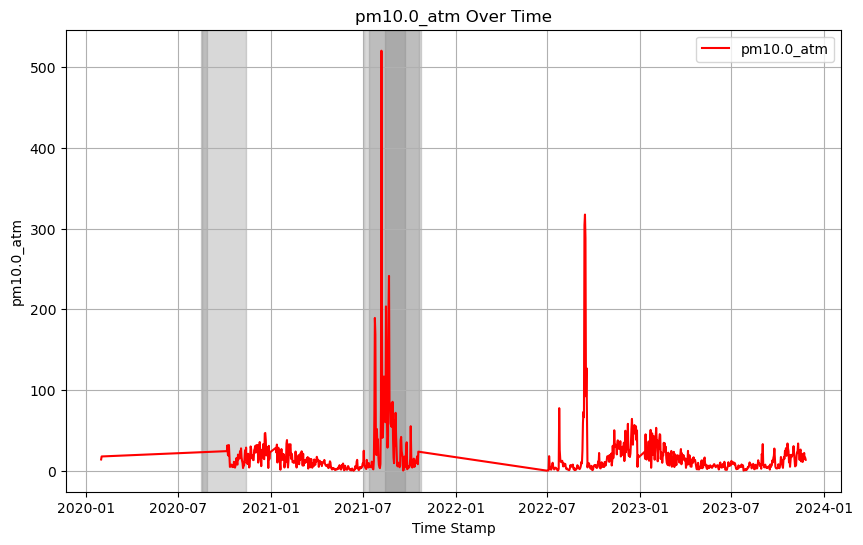

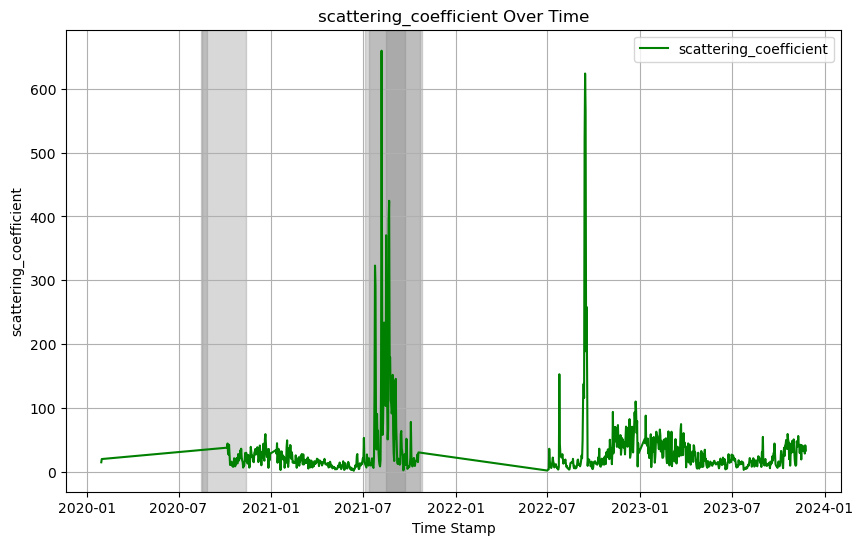

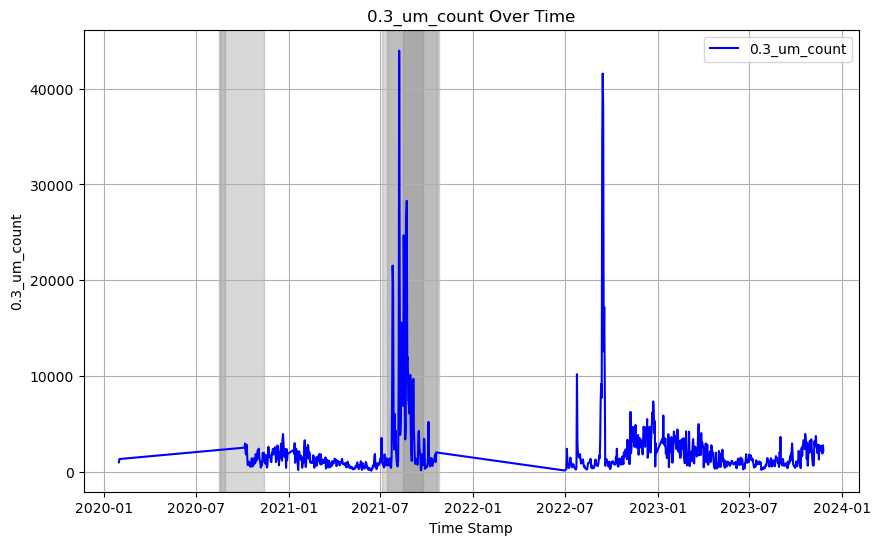

In [271]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 47673
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.11 12120 --> Except for outliers pretty good, close to fire (Markleeville)
### Alternative 40709, 12118could be good (Markleeville) in the middle of fire, but only 1

In [282]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 12120
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-10-27    46.900       26.800   828.695        6.0   
1 2023-06-21    14.389       76.722   834.124        1.0   
2 2023-03-02    36.466       24.664   830.577        2.0   
3 2023-01-22    41.200       31.950   835.004        3.4   
4 2023-08-23    26.693       83.695   834.064        4.5   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    18.3         121.9     1222.0555        1.8535   
1                     3.6         272.4      239.7070        0.0825   
2                     6.2         223.1      415.6125        0.7285   
3                     9.9         178.5      658.3195        1.5685   
4                    16.9         128.9     1124.9775        0.1805   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0      9.806    14.8850     14.8850     16.8130  
1      0.471     0.9440      0.9440      0.9825  
2      2.708     4.4965      4.5000      5.2455  
3      4.590     7.8805      7.8895      9.4665  
4      6.006     7.4285      7.4285      7.5535

In [273]:
df_2018 = df

In [275]:
df_2019 = df

In [277]:
df_2020 = df

In [279]:
df_2021 = df

In [281]:
df_2022 = df

In [283]:
df_2023 = df

In [284]:
# List of DataFrames
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1001, 13)

In [285]:
df = combined_df

In [286]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/12120.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

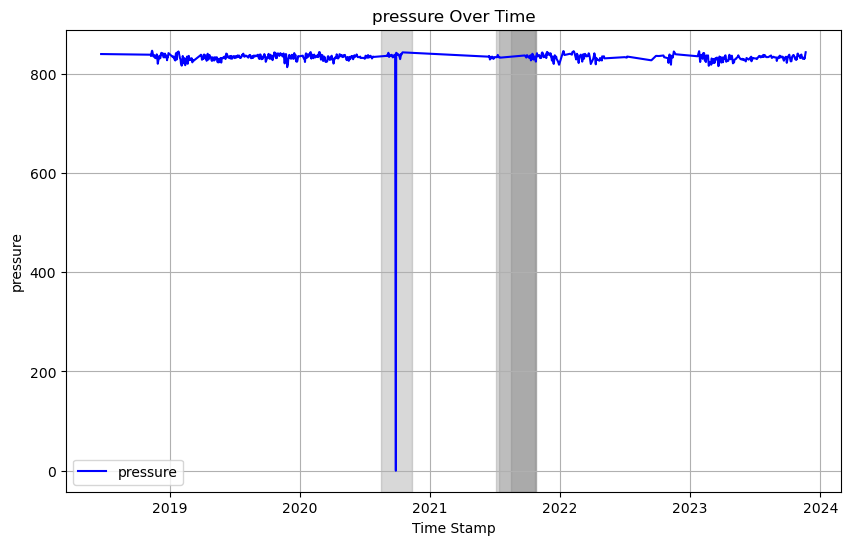

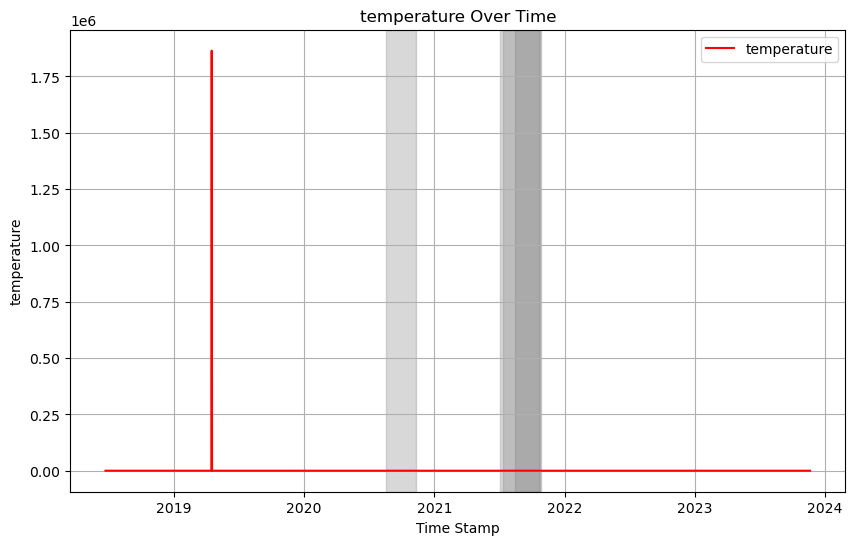

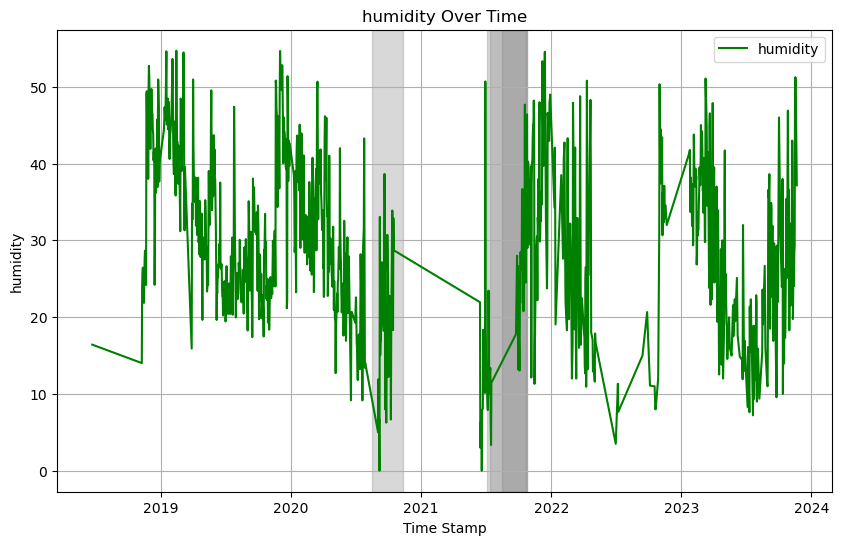

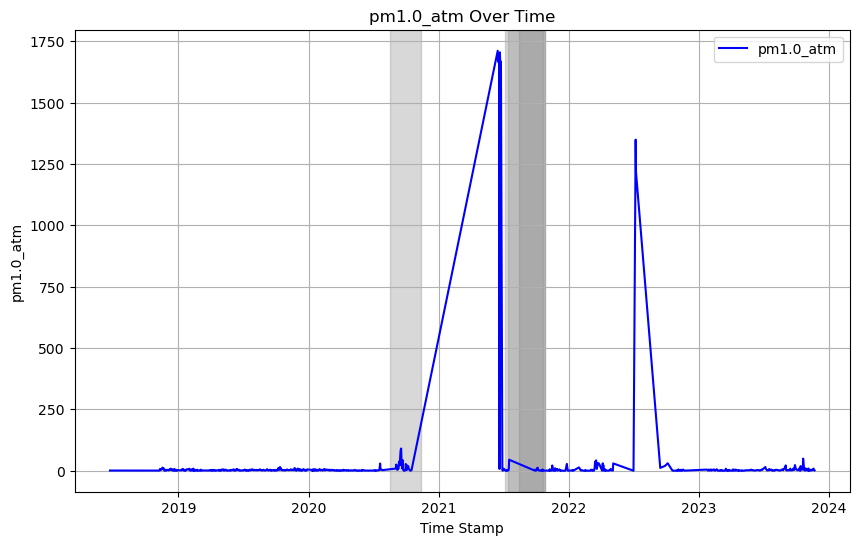

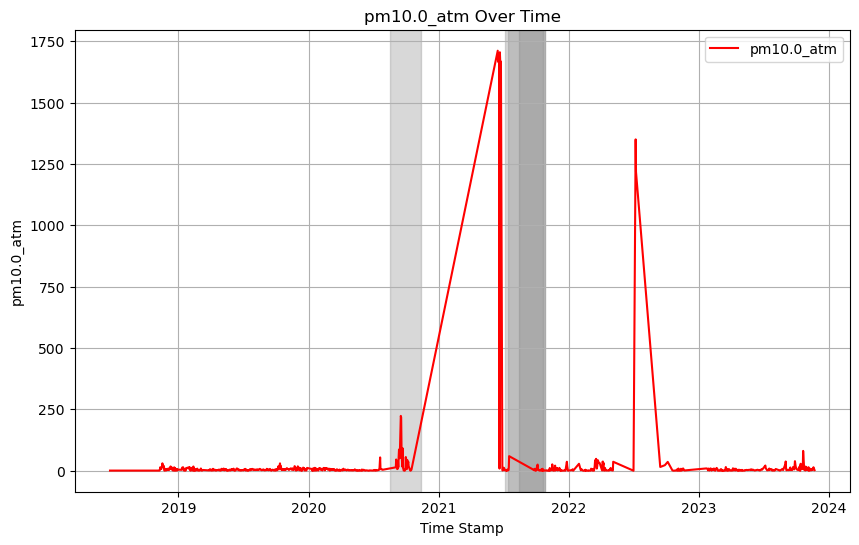

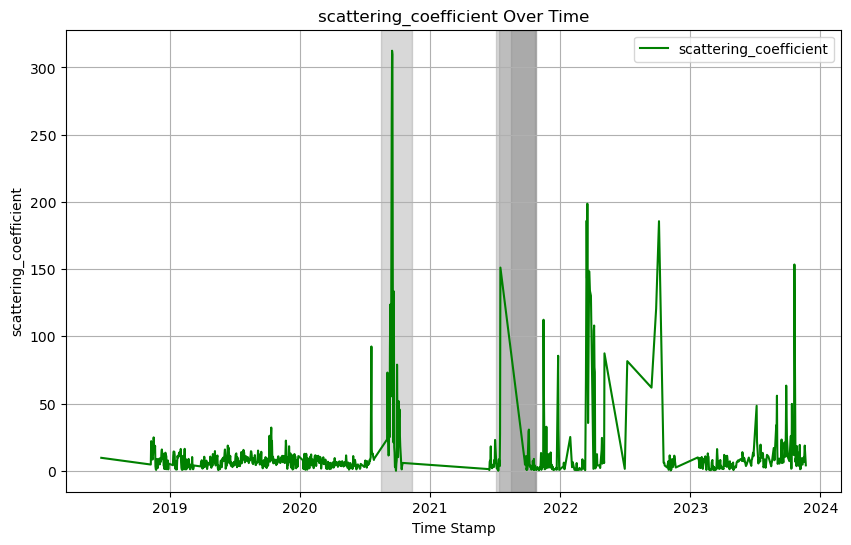

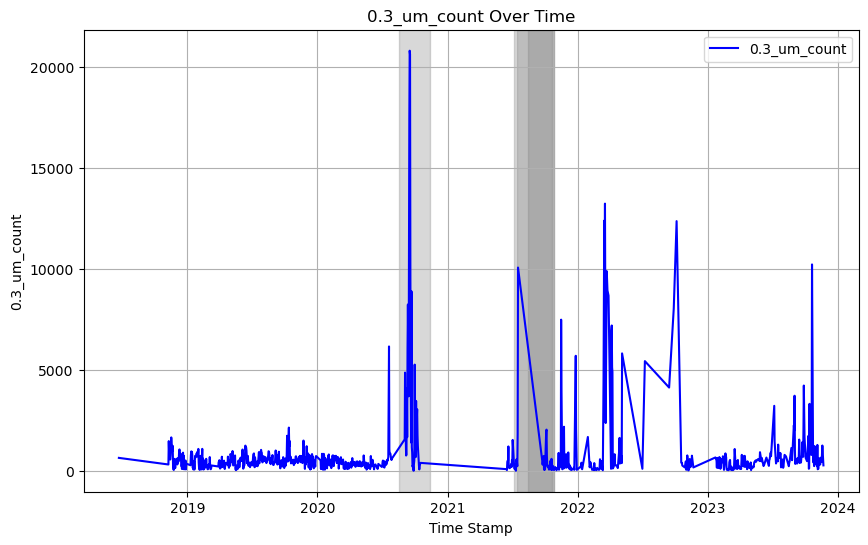

In [287]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 12120
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.12 12869 --> Died with the fire! (near Santa Cruz)
### Alternative 36619 near Santa Cruz very close to fire but only 1 fire according to map

In [295]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 12869
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2022-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2022-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

Empty DataFrame
Columns: [time_stamp, humidity, temperature, pressure, pm2.5_alt, scattering_coefficient, visual_range, 0.3_um_count, 5.0_um_count, pm1.0_atm, pm2.5_atm, pm2.5_cf_1, pm10.0_atm]
Index: []

In [289]:
df_2018 = df

In [291]:
df_2019 = df

In [293]:
df_2020 = df

In [296]:
# List of DataFrames
dfs = [df_2018, df_2019, df_2020]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(627, 13)

In [297]:
df = combined_df

In [298]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/12869.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

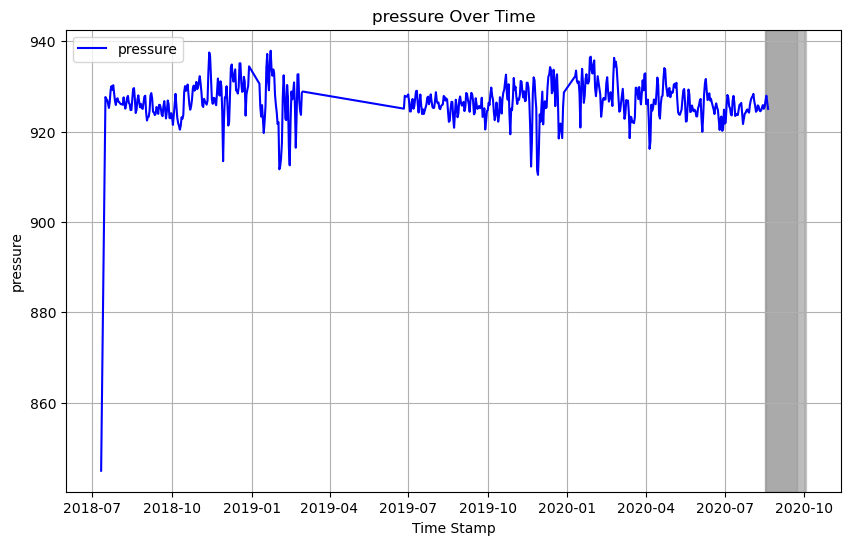

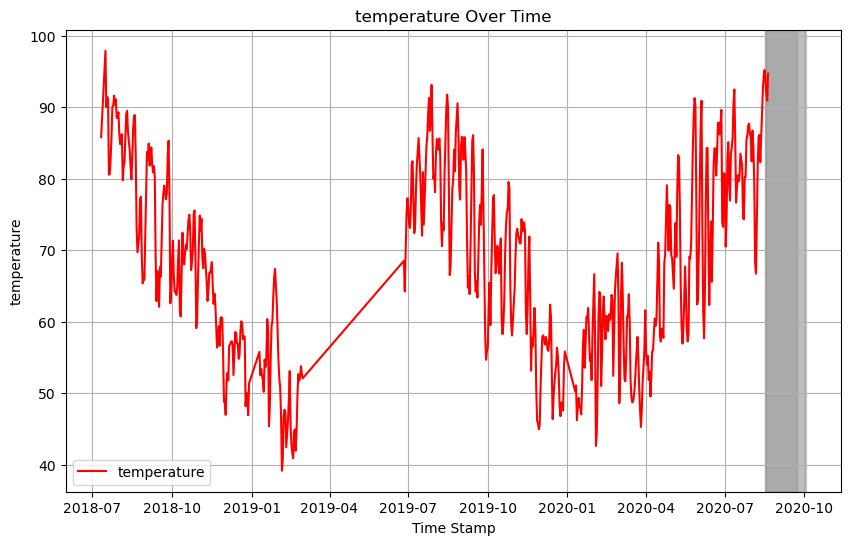

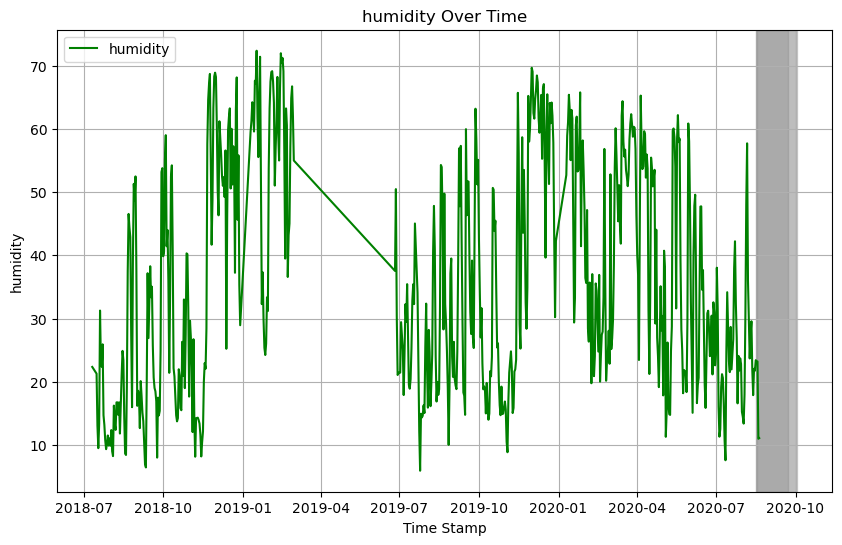

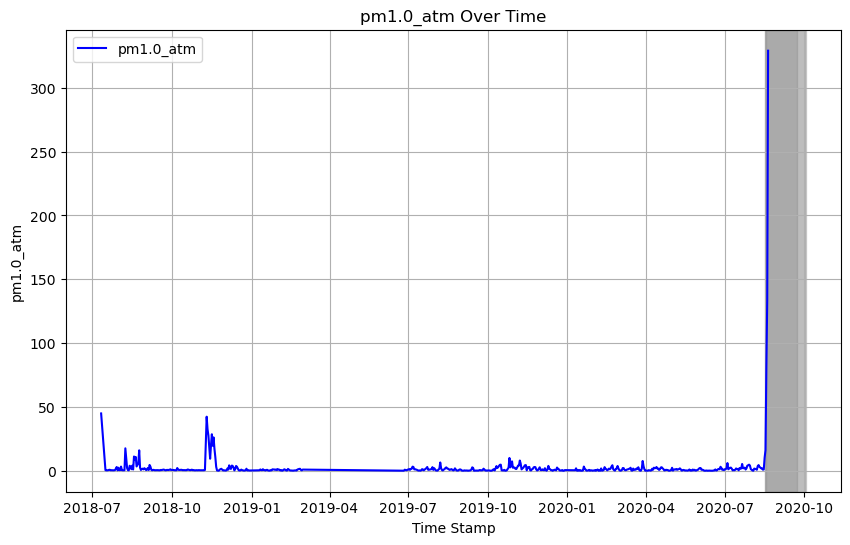

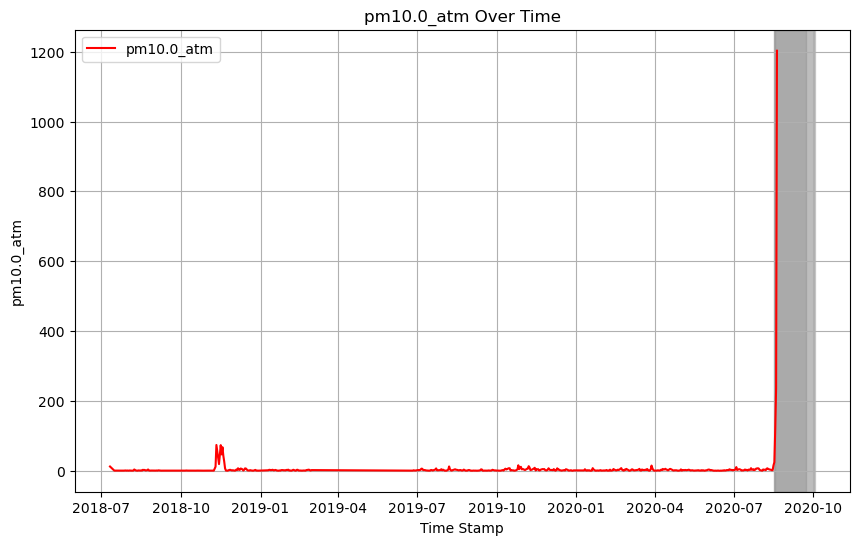

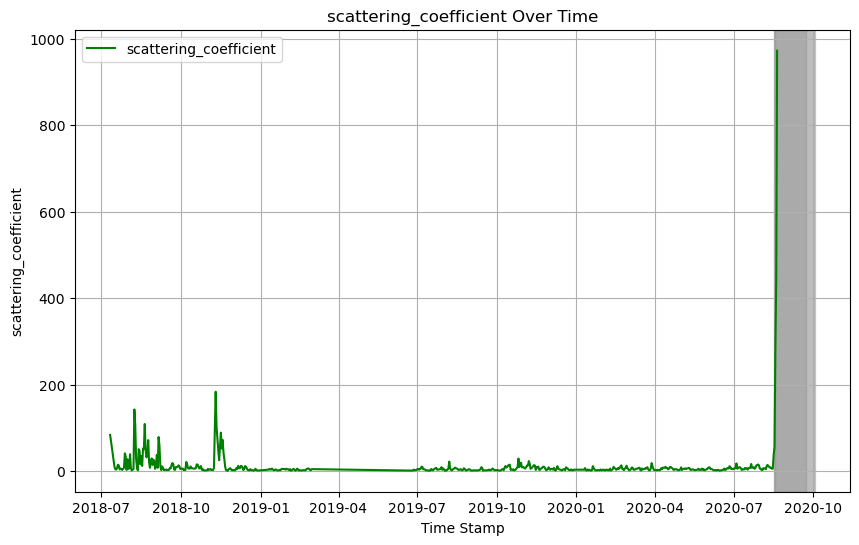

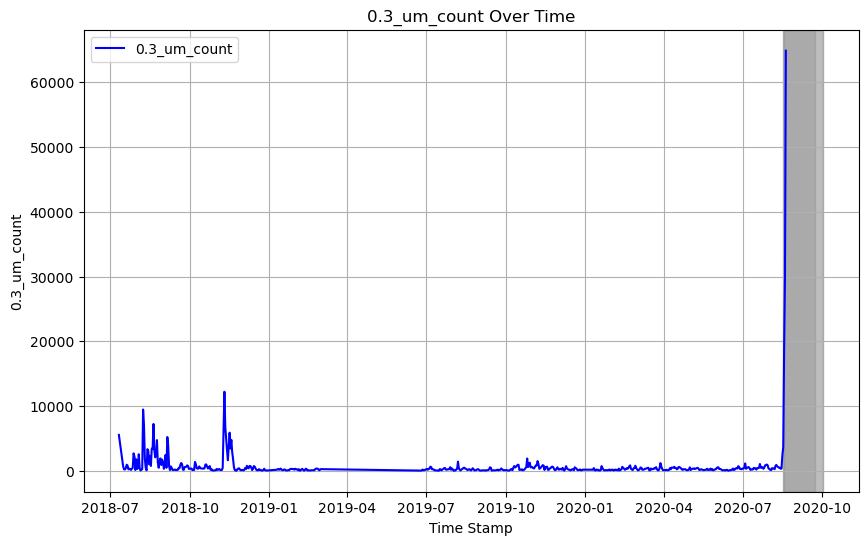

In [299]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 12869
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 7.13 12825 Walkers Fire, Pretty Good only one/two Fire (Near Camp Nelson)

In [315]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

api_key = "E911C960-894A-11EE-8616-42010A80000B"

sensor_id = 12825
endpoint = f"https://api.purpleair.com/v1/sensors/{sensor_id}/history"

headers = {
    "X-API-Key": api_key,
}

# Set the start timestamp for the three-year period
start_timestamp = '2023-01-10T00:00:00'
start_timestamp_unix = int(datetime.strptime(start_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

# Set the end timestamp for the one-year period (24 hours added to include the whole day of 2015-01-01)
end_timestamp = '2023-12-30T00:00:00'
end_timestamp_unix = int(datetime.strptime(end_timestamp, '%Y-%m-%dT%H:%M:%S').timestamp())

average = 1440  # 1440 minutes corresponds to 1 day

# Example parameters, you can modify or add more as needed
params = {
    "fields": "humidity,temperature,pressure,pm1.0_atm,pm2.5_alt,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count",
    "start_timestamp": start_timestamp_unix,
    "end_timestamp": end_timestamp_unix,
    "average": average
}

try:
    response = requests.get(endpoint, headers=headers, params=params)

    if response.status_code == 200:
        data3 = response.json()

    else:
        print(f"Error: {response.status_code} - {response.text}")

except Exception as e:
    print(f"An error occurred: {e}")
    
# Fill in missing values with 0
for entry in data3['data']:
    for i in range(len(entry)):
        if entry[i] is None:
            entry[i] = 0

# Create DataFrame
df = pd.DataFrame(data3['data'], columns=data3['fields'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')  # Convert timestamp to datetime if needed
df.head()

time_stamp  humidity  temperature  pressure  pm2.5_alt  \
0 2023-04-25    40.600       69.417   894.001        2.6   
1 2023-01-28    45.445       54.082   894.734        9.2   
2 2023-05-15    19.558       82.397   897.726        2.1   
3 2023-03-25    54.350       47.450   899.468        4.2   
4 2023-04-12    61.735       62.358   893.541       14.9   

   scattering_coefficient  visual_range  0.3_um_count  5.0_um_count  \
0                    11.6         163.3      771.2245         0.448   
1                    26.3          93.9     1752.6520         2.565   
2                     8.8         190.0      584.5465         0.362   
3                    16.8         129.1     1123.0145         0.688   
4                    47.7          58.0     3180.7830         2.204   

   pm1.0_atm  pm2.5_atm  pm2.5_cf_1  pm10.0_atm  
0     3.1260     4.0255      4.0395       4.317  
1    10.2725    17.3800     17.5660      19.479  
2     2.1360     2.8940      2.8940       3.122  
3     6.3730     8.4410      8.4410       8.952  
4    17.7125    26.2445     27.4000      28.492

In [301]:
df_2018 = df

In [303]:
df_2019 = df

In [305]:
df_2020 = df

In [307]:
df_2021 = df

In [314]:
df_2022 = df

In [316]:
df_2023 = df

In [317]:
# List of DataFrames
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Now result_df contains the concatenated data
combined_df.shape

(1832, 13)

In [318]:
df = combined_df

In [319]:
# Specify the path where you want to save the CSV file
csv_path = '/Users/jakobkuemmerle/Documents/CDL/API_AIR/12825.csv'

# Export the DataFrame to CSV
df.to_csv(csv_path, index=False)

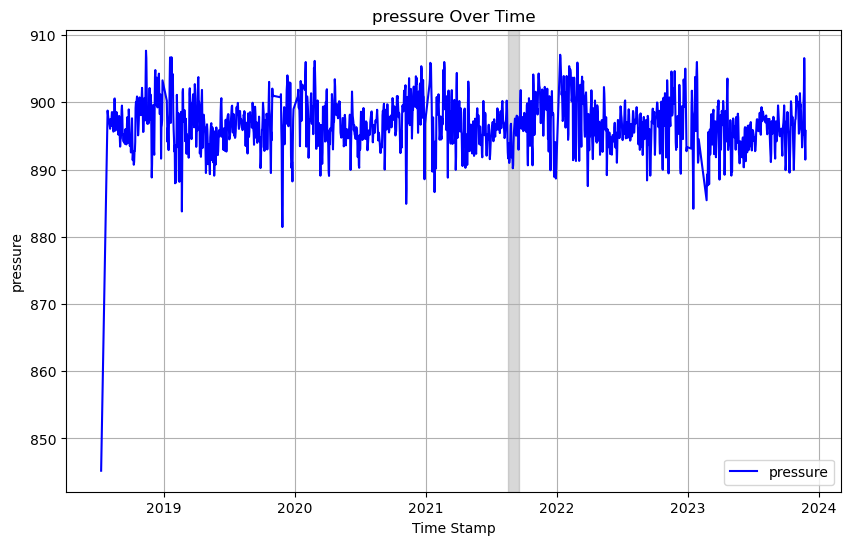

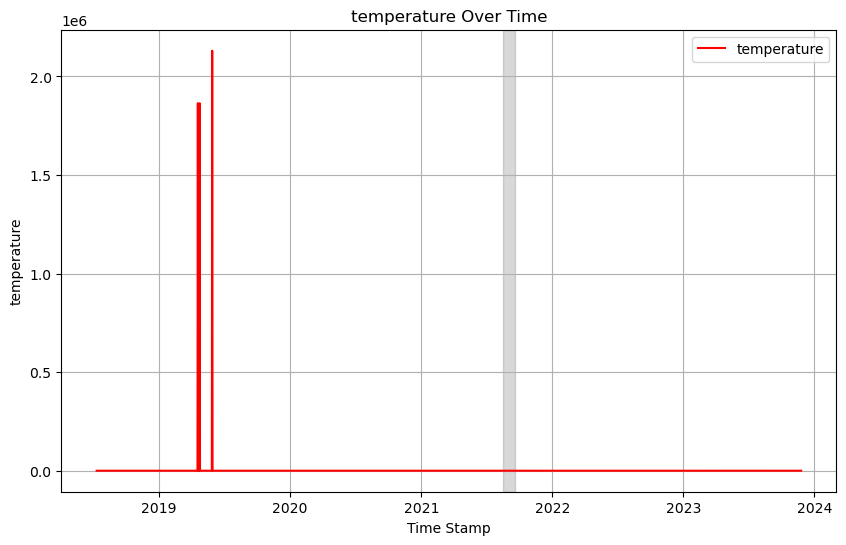

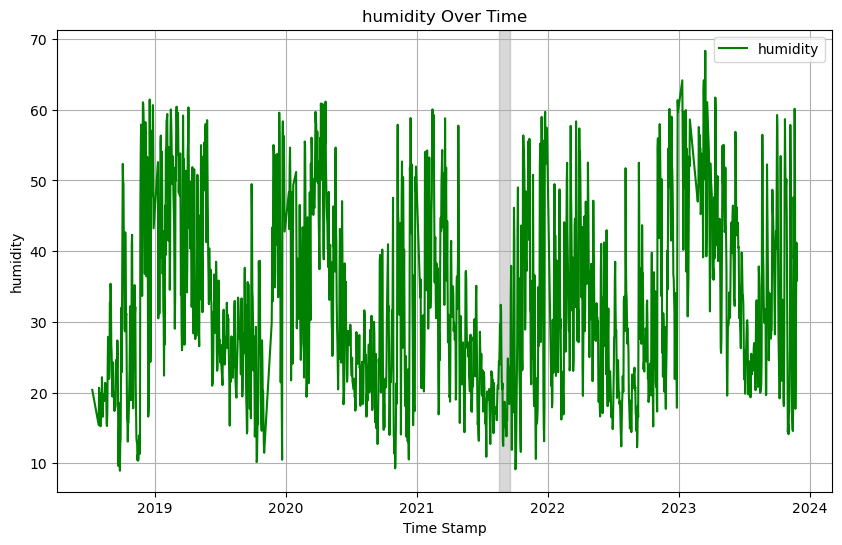

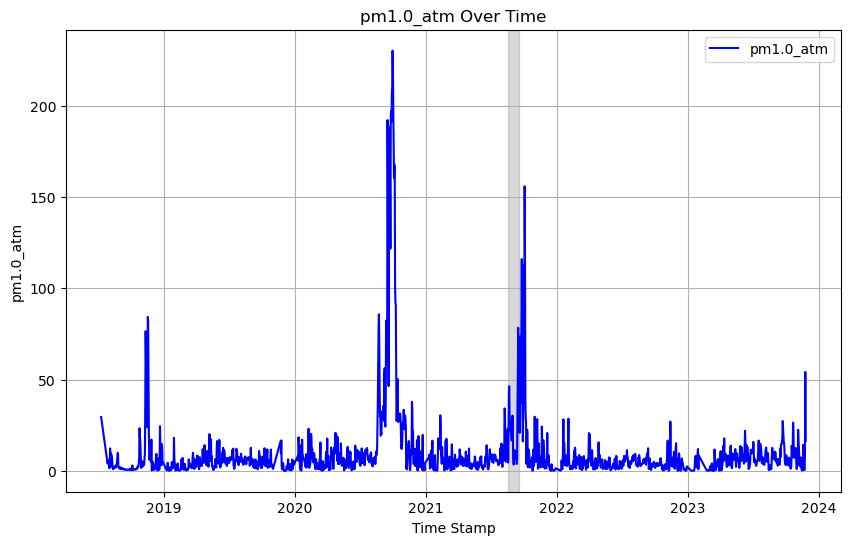

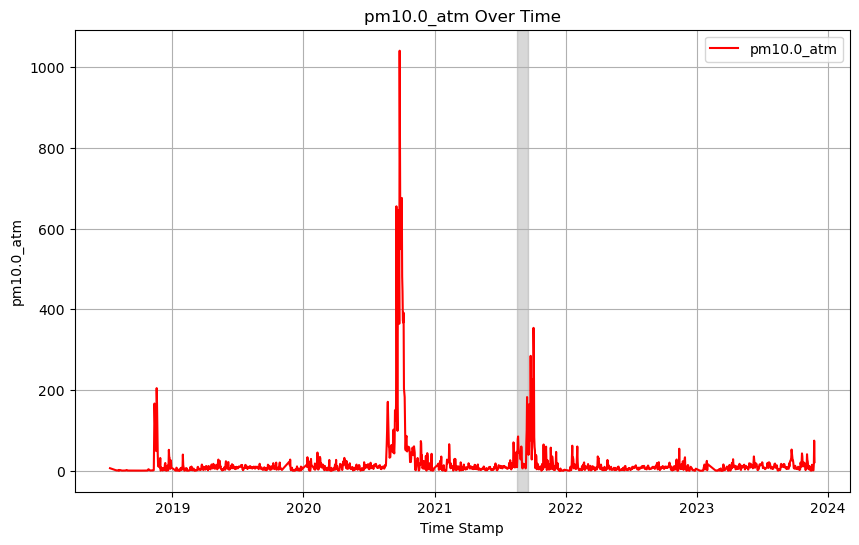

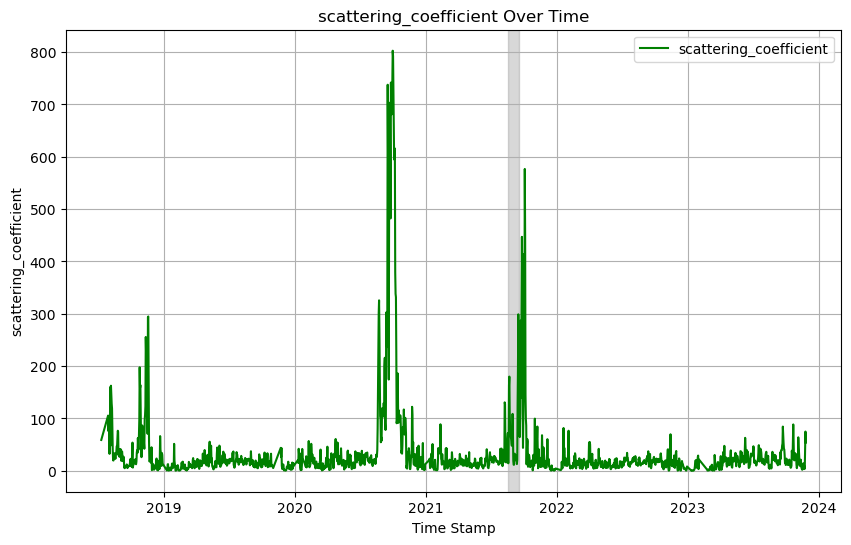

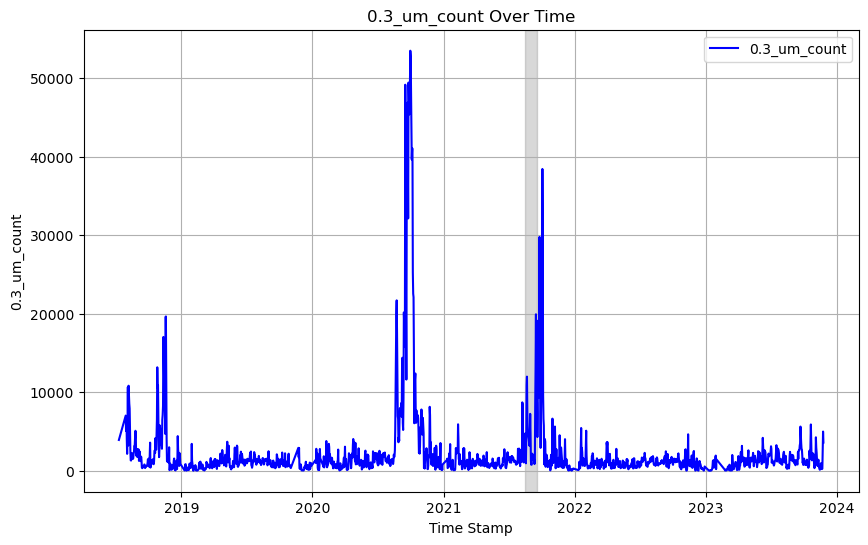

In [320]:
# Example: Get incidents and their timeframes for a specific sensor (sensor_index=5928)
sensor_index_to_plot = 12825
matching_incidents_info = result_df[result_df['sensor_index'] == sensor_index_to_plot]['matching_incidents'].iloc[0]

# Extract incident information from df_filtered
incidents_info = df_filtered[df_filtered['incident_name'].isin(matching_incidents_info)][['incident_name', 'incident_date_created', 'incident_date_extinguished']].to_dict('records')

# Plot data and mark incident time ranges for different parameters
plot_and_mark_incidents(df, incidents_info, 'pressure', 'blue')
plot_and_mark_incidents(df, incidents_info, 'temperature', 'red')
plot_and_mark_incidents(df, incidents_info, 'humidity', 'green')
plot_and_mark_incidents(df, incidents_info, 'pm1.0_atm', 'blue')
plot_and_mark_incidents(df, incidents_info, 'pm10.0_atm', 'red')
plot_and_mark_incidents(df, incidents_info, 'scattering_coefficient', 'green')
plot_and_mark_incidents(df, incidents_info, '0.3_um_count', 'blue')

# 8. Outline for Next Steps
## 8.1 Select 5 Sensors - Create accounts to get more API Keys since I'm running out soon
## 8.2 Get more frequent Data (Hourly/ 6Hours) - then we have to do it more often, i.e. hourly, we can only get 14 days of data at one API call, might still be good to predict the exact time
## 8.3 Potentially get more parameters (I did not include all of them)
## 8.4 Data Exploration
## 8.5 Get Wind/Precipitation for the exact locations of our sensors